<a href="https://colab.research.google.com/github/PROACT-team/2023-Loss-of-autonomy-in-swallowing/blob/main/4_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

In [ ]:
#Installing libraries needed

In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
pip install scikit-survival==0.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 15.1 MB/s eta 0:00:00


In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=da4cc294ebad34b060bfbe9d450fed750381cc113ca4d101140483ba7cff8399
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# adjusting figure resolution
plt.rcParams['figure.dpi'] = 300

In [ ]:
# Read datasets needed (if using local files)
from google.colab import files
uploaded = files.upload()

Saving 0227_X_y_imputed_whole.csv to 0227_X_y_imputed_whole.csv


In [ ]:
# Read datasets needed (if using local files)
import io
df_train = pd.read_csv(io.BytesIO(uploaded['X_and_Y_with_NaNs.csv']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read datasets needed (if using google drive)
df_train_with_NaN = pd.read_csv('/content/drive/MyDrive/Predicting Loss of Autonomy/1. Swallowing/Jul 2022 PRO-ACT data (latest update)/Files/X_and_Y_with_NaNs.csv')

In [ ]:
df_train_with_NaN.drop(columns=['Unnamed: 0', 'SubjectID'], inplace = True)
df_train_with_NaN #3396 subjects

,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,...,slope_motor,slope_respiratory_R,mean_fvc,slope_fvc,mean_creatinine,slope_creatinine,mean_weight,slope_weight,time_LOA,status_LOA
0,7.0,0,9.93,16.47,0,-6.54,4.00,4.000000,4.00,3.500000,...,-0.293851,0.000000,NaN,NaN,53.0400,0.000000,120.033333,1.979045,10.18,0.0
1,10.0,0,1.45,33.63,1,-32.18,1.00,1.333333,2.00,4.000000,...,0.770871,0.000000,73.451389,NaN,79.5600,0.000000,51.000000,-0.228993,6.44,1.0
2,12.0,0,1.61,16.90,0,-15.29,4.00,3.750000,3.25,4.000000,...,-1.195652,-0.434783,89.400000,-1.283922,NaN,NaN,62.220000,-0.443537,2.06,0.0
3,5.0,1,16.80,18.74,0,-1.94,2.50,3.000000,3.00,1.500000,...,-1.898734,0.632911,71.333333,0.000000,58.4000,-0.703942,121.400000,NaN,5.02,1.0
4,8.0,0,12.43,25.08,0,-12.65,4.00,4.000000,4.00,4.000000,...,NaN,NaN,85.790970,NaN,53.0400,NaN,88.900000,-1.500000,9.43,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,11.0,1,1.08,33.24,0,-32.16,3.00,3.500000,3.75,3.000000,...,-0.824911,0.000000,NaN,NaN,57.4725,-0.628392,NaN,NaN,1.41,0.0
3392,9.0,1,1.61,32.84,1,-31.23,3.00,3.000000,4.00,4.000000,...,NaN,NaN,74.666667,NaN,83.9800,5.854305,84.750000,NaN,9.82,0.0
3393,6.0,1,7.63,12.16,0,-4.53,4.00,4.000000,4.00,4.000000,...,0.000000,0.055136,NaN,NaN,65.0000,-3.842884,NaN,NaN,10.78,0.0
3394,7.0,1,2.76,16.18,0,-13.42,2.75,3.000000,2.75,4.000000,...,-0.120494,0.000000,100.600000,-0.333391,NaN,NaN,70.460000,-0.618819,3.05,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [ ]:
# Drop features with NaN proportion > 40% : ['slope_fvc', 'slope_Creatinine', 'slope_weight'] is excluded
df_train_with_NaN.drop(['slope_fvc', 'slope_creatinine', 'slope_weight'], axis=1, inplace=True)

In [ ]:
# Scaling with RobustScaler
categorical_and_y = df_train_with_NaN[['Gender', 'onset_site','time_LOA', 'status_LOA']]
X_continuous_NaN = df_train_with_NaN.drop(['Gender', 'onset_site','time_LOA', 'status_LOA'], axis = 1)
columns = X_continuous_NaN.columns
scaler = RobustScaler()
scaled = scaler.fit_transform(X_continuous_NaN)
X_continuous_scaled = pd.DataFrame(scaled, columns = columns)
df_train_with_NaN_scaled = pd.concat([X_continuous_scaled, categorical_and_y],axis=1)
df_train_with_NaN_scaled

,Age,diag_delta,onset_delta,diag_minus_onset,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,...,slope_bulbar,slope_motor,slope_respiratory_R,mean_fvc,mean_creatinine,mean_weight,Gender,onset_site,time_LOA,status_LOA
0,-0.333333,0.528941,-0.044269,0.317178,0.50,0.000000,0.00,0.393443,-0.250000,0.333333,...,0.000000,0.166066,0.000000,NaN,-0.494151,1.984367,0,0,10.18,0.0
1,0.666667,-0.515394,1.312253,-2.828834,-2.50,-2.666667,-2.00,0.786885,0.833333,0.666667,...,-5.351714,1.145610,0.000000,-0.446361,0.564743,-1.221268,0,1,6.44,1.0
2,1.333333,-0.495690,-0.010277,-0.756442,0.50,-0.250000,-0.75,0.786885,0.250000,0.666667,...,3.546674,-0.663592,-18.550000,0.274028,NaN,-0.700255,0,0,2.06,0.0
3,-1.000000,1.375000,0.135178,0.881595,-1.00,-1.000000,-1.00,-1.180328,-1.500000,-1.666667,...,-6.883840,-1.310427,27.003165,-0.542033,-0.280136,2.047829,1,0,5.02,1.0
4,0.000000,0.836823,0.636364,-0.432515,0.50,0.000000,0.00,0.786885,-0.500000,0.000000,...,NaN,NaN,NaN,0.111010,-0.494151,0.538658,0,0,9.43,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,1.000000,-0.560961,1.281423,-2.826380,-0.50,-0.500000,-0.25,0.000000,0.250000,-0.666667,...,3.320390,-0.322510,0.000000,NaN,-0.317169,NaN,1,0,1.41,0.0
3392,0.333333,-0.495690,1.249802,-2.712270,-0.50,-1.000000,0.00,0.786885,1.500000,0.000000,...,NaN,NaN,NaN,-0.391468,0.741226,0.345948,1,1,9.82,0.0
3393,-0.666667,0.245690,-0.384980,0.563804,0.50,0.000000,0.00,0.786885,0.500000,0.000000,...,0.000000,0.436408,2.352391,NaN,-0.016610,NaN,1,0,10.78,0.0
3394,-0.333333,-0.354064,-0.067194,-0.526994,-0.75,-1.000000,-1.25,0.786885,0.500000,0.666667,...,-7.121953,0.325554,0.000000,0.779925,NaN,-0.317622,1,0,3.05,0.0


In [ ]:
df_train_with_NaN_scaled.describe()

,Age,diag_delta,onset_delta,diag_minus_onset,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,...,slope_bulbar,slope_motor,slope_respiratory_R,mean_fvc,mean_creatinine,mean_weight,Gender,onset_site,time_LOA,status_LOA
count,3396.000000,3.396000e+03,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,...,2921.000000,2921.000000,2921.000000,2141.000000,3039.000000,2630.000000,3396.000000,3396.000000,3396.000000,3396.000000
mean,-0.085296,3.120188e-01,0.196489,-0.272638,-0.225412,-0.476644,-0.439856,-0.023024,-0.047448,0.016788,...,-0.835061,-0.109958,-4.811746,0.058895,0.056845,0.093247,0.644876,0.180212,7.522064,0.181095
std,0.749813,1.046770e+00,0.963531,1.082189,0.875567,0.710993,0.592431,0.768144,0.965964,0.604713,...,3.388058,0.857088,20.895913,0.742023,0.710818,0.937737,0.478621,0.384421,5.964656,0.385154
min,-2.666667,-6.939655e-01,-1.164427,-11.276687,-3.500000,-4.000000,-2.000000,-2.360656,-2.500000,-2.000000,...,-17.733370,-4.943709,-192.680645,-2.085320,-1.906009,-3.250522,0.000000,0.000000,0.020000,0.000000
25%,-0.666667,-3.663793e-01,-0.436364,-0.603067,-0.500000,-1.000000,-1.000000,-0.213115,-0.500000,-0.333333,...,-1.000000,-0.563592,-1.000000,-0.461731,-0.493751,-0.476434,0.000000,0.000000,2.950000,0.000000
50%,0.000000,5.464379e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.750000,0.000000
75%,0.333333,6.336207e-01,0.563636,0.396933,0.500000,0.000000,0.000000,0.786885,0.500000,0.666667,...,0.000000,0.436408,0.000000,0.538269,0.506249,0.523566,1.000000,0.000000,10.180000,0.000000
max,2.000000,2.020259e+01,15.864032,1.119632,0.500000,0.000000,0.000000,0.786885,1.500000,0.666667,...,14.114841,3.080086,141.430939,2.573286,5.859213,8.545778,1.000000,1.000000,66.500000,1.000000


In [ ]:
#Imputation for final model construction
#Notice that this imputation process is done again in every cross validation

def Impute_df(df_train_before_imputation):
  y = df_train_before_imputation[['time_LOA', 'status_LOA']]
  X_NaN = df_train_before_imputation.drop(['time_LOA', 'status_LOA'], axis=1)
  columns = X_NaN.columns
  imputer = IterativeImputer(max_iter=10, random_state=11)
  ar = imputer.fit_transform(X_NaN)
  X_imputed = pd.DataFrame(ar, columns = columns)
  df_train_after_imputation = pd.concat([X_imputed, y],axis=1)

  return df_train_after_imputation

In [ ]:
df_train_imputed = Impute_df(df_train_with_NaN)
df_train_imputed_scaled = Impute_df(df_train_with_NaN_scaled)

In [ ]:
#Feature selection results
aft_final_feature_list = ['Age', 'onset_site', 'mean_R3_Respiratory_Insufficiency', 'mean_weight', 'diag_delta', 'mean_Q5_Cutting', 'mean_creatinine', 'mean_Q2_Salivation', 'mean_fvc', 'mean_Q3_Swallowing', 'mean_Q7_Turning_in_Bed', 'onset_delta', 'mean_bulbar']

cph_final_feature_list = ['mean_bulbar', 'onset_delta', 'mean_Q3_Swallowing', 'mean_fvc', 'mean_Q7_Turning_in_Bed', 'mean_Q2_Salivation', 'mean_creatinine', 'mean_weight', 'mean_ALSFRS_R_Total', 'diag_delta', 'mean_Q5_Cutting', 'mean_R3_Respiratory_Insufficiency', 'onset_site', 'Age']

rsf_final_feature_list = ['mean_Q2_Salivation', 'Age', 'mean_fvc', 'mean_ALSFRS_R_Total', 'mean_Q3_Swallowing', 'onset_delta', 'mean_bulbar', 'mean_Q1_Speech']

# 1. Model paramemeters

## 1-1. AFT

In [ ]:
#load packages
from lifelines import WeibullAFTFitter
from lifelines import utils
from numpy import exp

In [ ]:
#Fit the AFT model
#Print accelerated failure rate & p-value of each feature
aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
aft.fit(df_train_imputed_scaled[aft_final_feature_list+['time_LOA', 'status_LOA']], duration_col='time_LOA', event_col='status_LOA', ancillary=False)
aft_summary = aft.summary

aft_summary = aft_summary.sort_values(by='coef', ascending=False).reset_index().iloc[:, 1:]
aft_summary

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
0,Intercept,3.646657,38.346257,0.063120,3.522944,3.770369,33.884049,43.396096,0.0,57.773576,0.000000e+00,inf
1,mean_bulbar,0.554283,1.740693,0.086970,0.383826,0.724741,1.467889,2.064196,0.0,6.373286,1.850209e-10,32.331593
2,Intercept,0.394969,1.484337,0.030319,0.335545,0.454392,1.398702,1.575216,0.0,13.027200,8.569504e-39,126.455984
3,onset_delta,0.299869,1.349683,0.056325,0.189475,0.410264,1.208615,1.507216,0.0,5.323928,1.015503e-07,23.231303
4,mean_fvc,0.252122,1.286754,0.052701,0.148831,0.355414,1.160477,1.426771,0.0,4.784038,1.718080e-06,19.150772
5,mean_Q3_Swallowing,0.153847,1.166313,0.081733,-0.006346,0.314041,0.993674,1.368946,0.0,1.882320,5.979256e-02,4.063890
6,mean_Q7_Turning_in_Bed,0.111187,1.117603,0.066078,-0.018323,0.240696,0.981844,1.272135,0.0,1.682666,9.243972e-02,3.435343
7,mean_creatinine,0.101096,1.106383,0.047894,0.007225,0.194968,1.007251,1.215272,0.0,2.110817,3.478803e-02,4.845265
8,mean_Q2_Salivation,0.091748,1.096089,0.043064,0.007344,0.176152,1.007371,1.192619,0.0,2.130501,3.313024e-02,4.915707
9,mean_weight,0.074290,1.077119,0.034450,0.006769,0.141811,1.006792,1.152359,0.0,2.156437,3.104959e-02,5.009282


In [ ]:
aft_summary = aft_summary.round(4).astype('str')
aft_summary['log AFR (95% CI)'] = aft_summary['coef']+" ("+aft_summary['coef lower 95%']+" ~ "+aft_summary['coef upper 95%']+")"
aft_summary['AFR (95% CI)'] = aft_summary['exp(coef)']+" ("+aft_summary['exp(coef) lower 95%']+" ~ "+aft_summary['exp(coef) upper 95%']+")"
aft_summary['Standard Error'] = aft_summary['se(coef)']
aft_summary['p value'] = aft_summary['p']
aft_summary[aft_summary['covariate'].isin(aft_final_feature_list)][['covariate', 'log AFR (95% CI)', 'AFR (95% CI)', 'Standard Error', 'p value']]

,covariate,log AFR (95% CI),AFR (95% CI),Standard Error,p value
1,mean_bulbar,0.5543 (0.3838 ~ 0.7247),1.7407 (1.4679 ~ 2.0642),0.087,0.0
3,onset_delta,0.2999 (0.1895 ~ 0.4103),1.3497 (1.2086 ~ 1.5072),0.0563,0.0
4,mean_fvc,0.2521 (0.1488 ~ 0.3554),1.2868 (1.1605 ~ 1.4268),0.0527,0.0
5,mean_Q3_Swallowing,0.1538 (-0.0063 ~ 0.314),1.1663 (0.9937 ~ 1.3689),0.0817,0.0598
6,mean_Q7_Turning_in_Bed,0.1112 (-0.0183 ~ 0.2407),1.1176 (0.9818 ~ 1.2721),0.0661,0.0924
7,mean_creatinine,0.1011 (0.0072 ~ 0.195),1.1064 (1.0073 ~ 1.2153),0.0479,0.0348
8,mean_Q2_Salivation,0.0917 (0.0073 ~ 0.1762),1.0961 (1.0074 ~ 1.1926),0.0431,0.0331
9,mean_weight,0.0743 (0.0068 ~ 0.1418),1.0771 (1.0068 ~ 1.1524),0.0345,0.031
10,diag_delta,0.0677 (-0.0298 ~ 0.1652),1.07 (0.9706 ~ 1.1796),0.0497,0.1736
11,mean_Q5_Cutting,0.0638 (-0.0478 ~ 0.1753),1.0658 (0.9534 ~ 1.1916),0.0569,0.2624


/usr/local/lib/python3.10/dist-packages/lifelines/fitters/__init__.py:3334: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  ax.errorbar(hazards["coefs"], yaxis_locations, xerr=hazards["se"], **errorbar_kwargs)


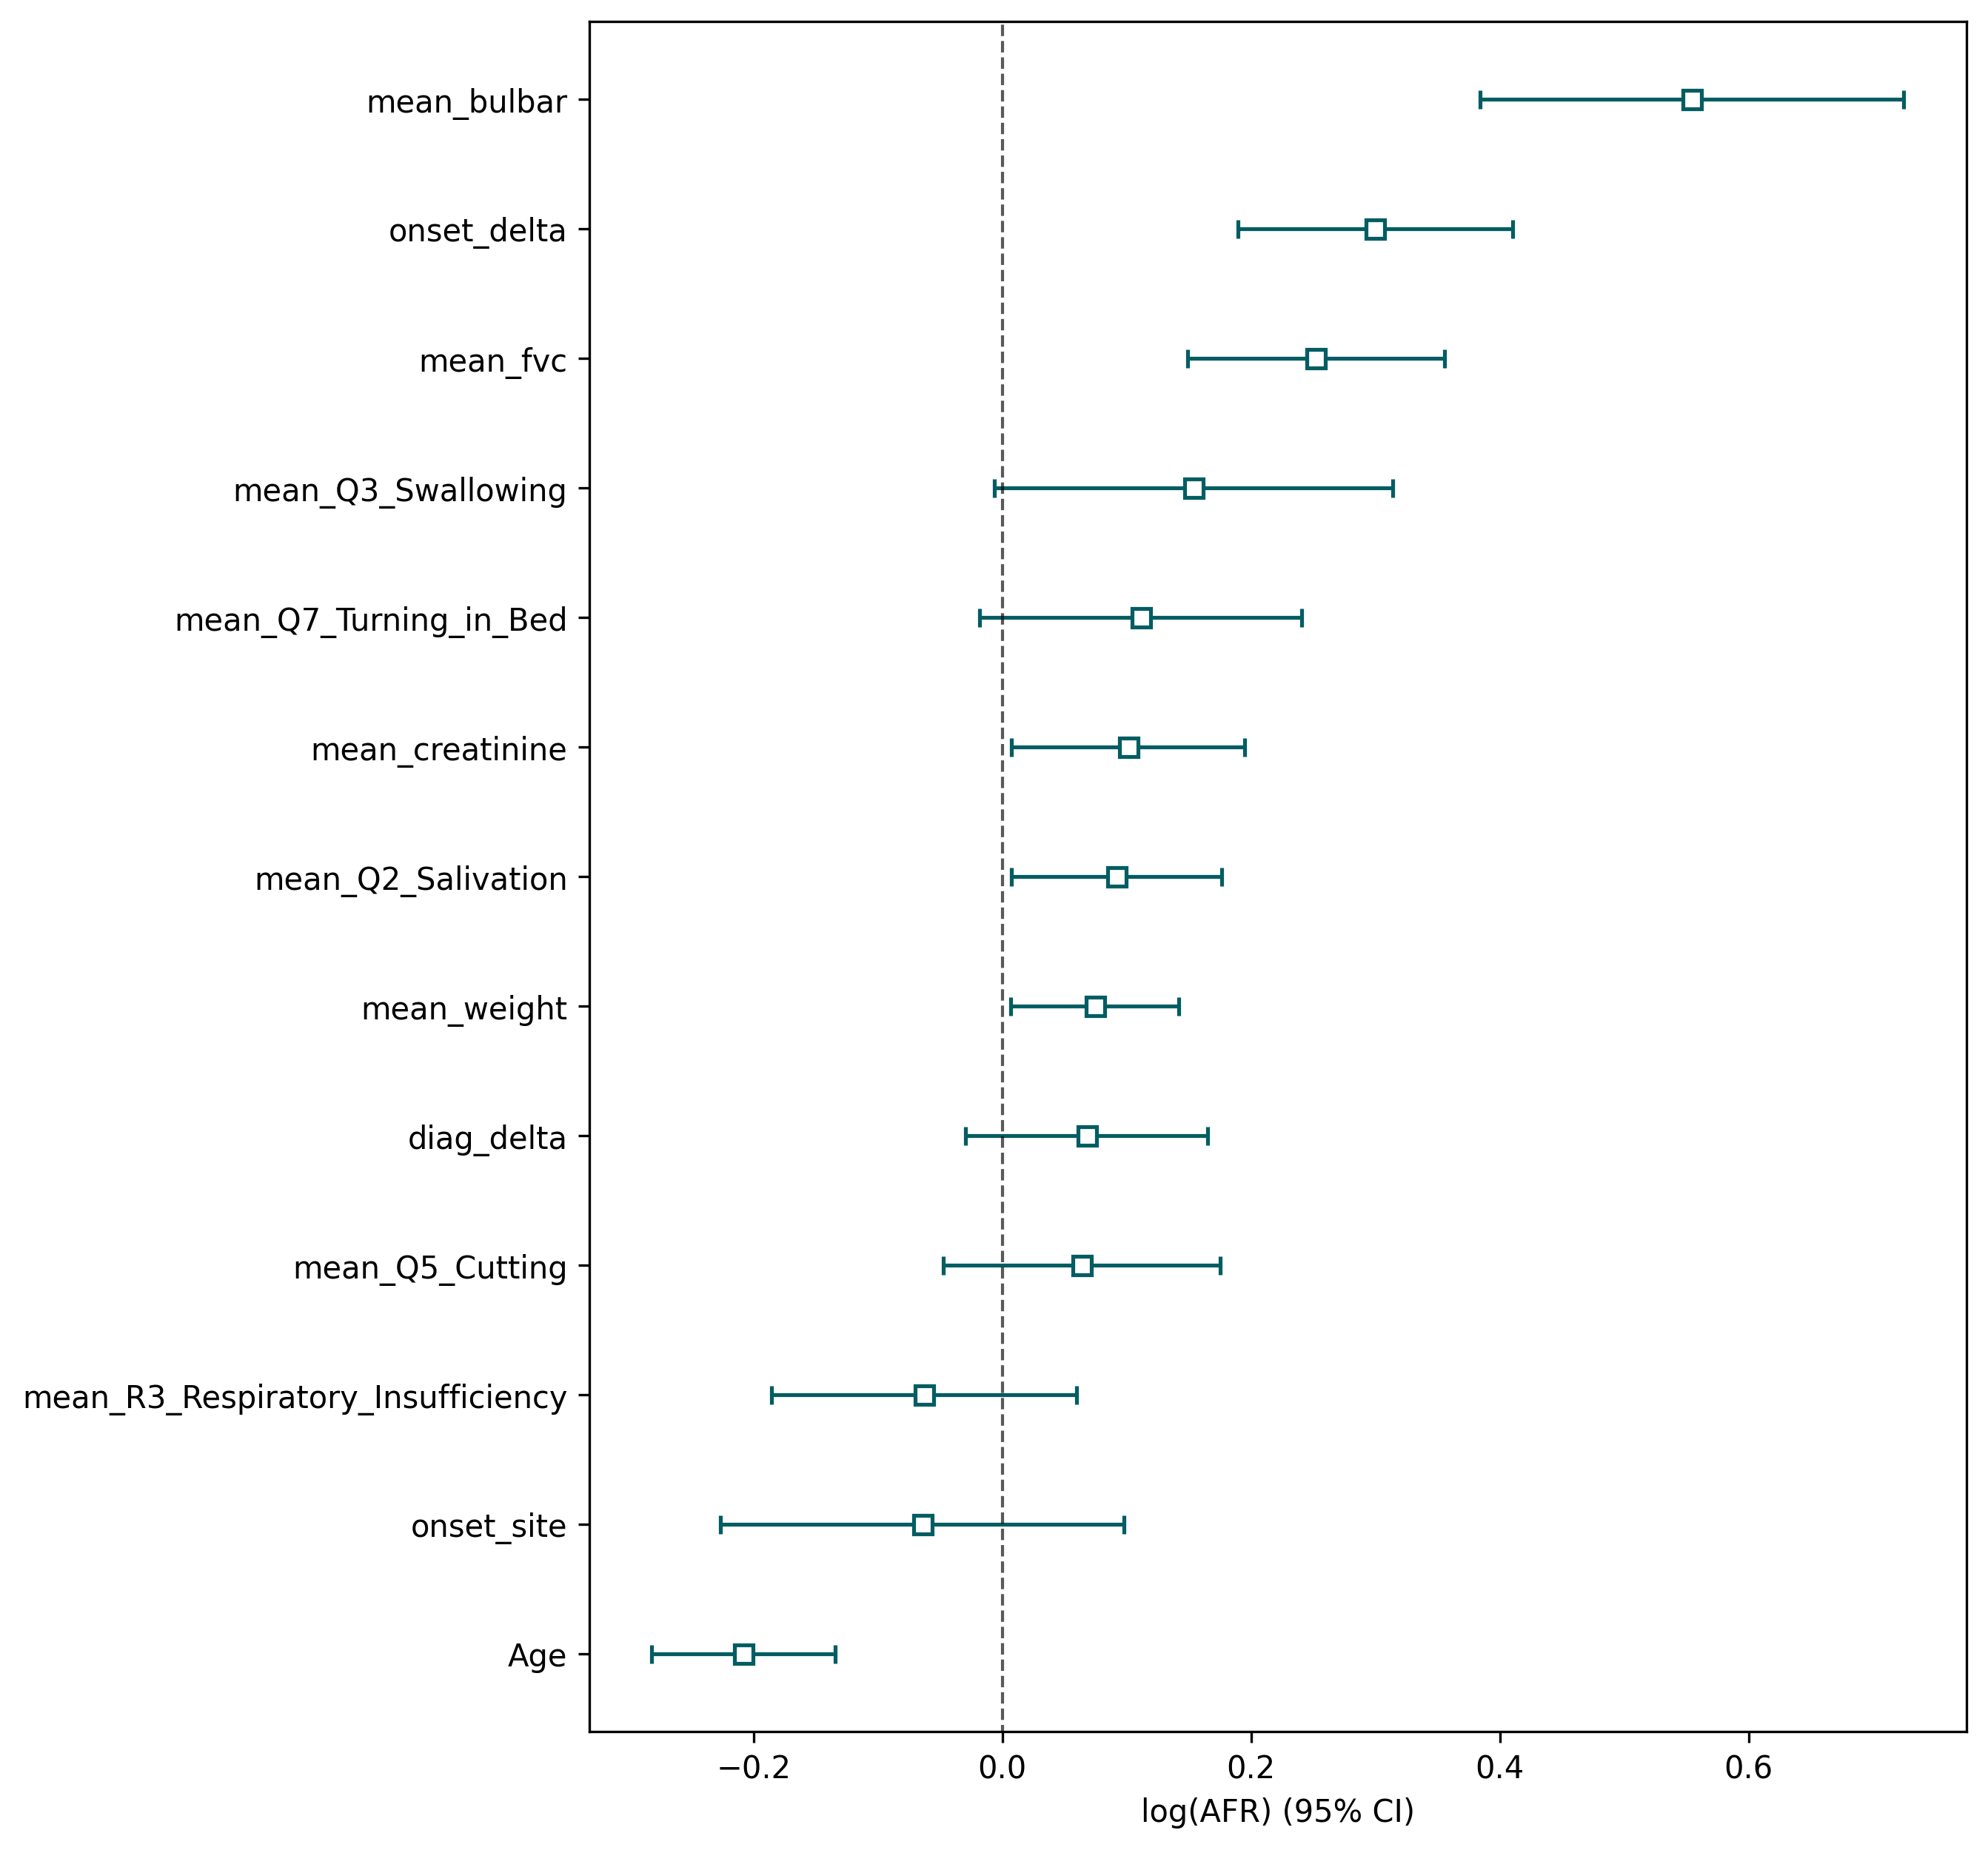

In [ ]:
# Print 95% CI log(AFR) in a plot
aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1).fit(df_train_imputed_scaled[aft_final_feature_list+['time_LOA', 'status_LOA']], 'time_LOA', 'status_LOA', ancillary=False)

plt.figure(figsize=(8,10))
ax = aft.plot(['Age',  'onset_site','mean_R3_Respiratory_Insufficiency',  'mean_Q5_Cutting', 'diag_delta', 'mean_weight', 'mean_Q2_Salivation', 'mean_creatinine',
               'mean_Q7_Turning_in_Bed', 'mean_Q3_Swallowing', 'mean_fvc', 'onset_delta','mean_bulbar'], c='#005D62', marker='s')
new_labels = [label.get_text().replace(': lambda_', '') for label in ax.get_yticklabels()] # Delete unnecessary text
ax.set_yticklabels(new_labels)
ax.set_xlabel('log(AFR) (95% CI)')
plt.show()

## 1-2. COX

In [ ]:
#load packages
from lifelines import CoxPHFitter

In [ ]:
#Fit the COX model
#Print accelerated failure rate & p-value of each feature
cph = CoxPHFitter(penalizer = 0.01, l1_ratio = 1)
cph.fit(df_train_imputed_scaled[cph_final_feature_list+['time_LOA', 'status_LOA']], 'time_LOA', event_col='status_LOA')
cph_summary = cph.summary

cph_summary = cph_summary.sort_values(by='coef', ascending=False).reset_index()
cph_summary

,covariate,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
0,Age,0.280231,1.323436,0.057270,0.167985,0.392478,1.182919,1.480645,0.0,4.893187,9.921605e-07,19.942923
1,onset_site,0.065684,1.067890,0.123386,-0.176147,0.307515,0.838495,1.360042,0.0,0.532350,5.944837e-01,0.750291
2,mean_R3_Respiratory_Insufficiency,0.065517,1.067711,0.092107,-0.115010,0.246043,0.891358,1.278955,0.0,0.711311,4.768914e-01,1.068267
3,mean_ALSFRS_R_Total,-0.000009,0.999991,0.001918,-0.003769,0.003750,0.996238,1.003757,0.0,-0.004928,9.960682e-01,0.005684
4,mean_Q5_Cutting,-0.064321,0.937704,0.084689,-0.230308,0.101667,0.794289,1.107015,0.0,-0.759489,4.475604e-01,1.159846
5,diag_delta,-0.067094,0.935107,0.072520,-0.209231,0.075043,0.811208,1.077930,0.0,-0.925178,3.548731e-01,1.494625
6,mean_weight,-0.098570,0.906133,0.050350,-0.197254,0.000115,0.820982,1.000115,0.0,-1.957676,5.026804e-02,4.314215
7,mean_creatinine,-0.121345,0.885728,0.070843,-0.260195,0.017504,0.770901,1.017659,0.0,-1.712876,8.673531e-02,3.527237
8,mean_Q2_Salivation,-0.135775,0.873039,0.064173,-0.261552,-0.009999,0.769856,0.990051,0.0,-2.115775,3.436391e-02,4.862962
9,mean_Q7_Turning_in_Bed,-0.146308,0.863892,0.098660,-0.339677,0.047062,0.712000,1.048187,0.0,-1.482954,1.380866e-01,2.856355


In [ ]:
cph_summary = cph_summary.round(4).astype('str')
cph_summary['HR (95% CI)'] = cph_summary['coef']+" ("+cph_summary['coef lower 95%']+" ~ "+cph_summary['coef upper 95%']+")"
cph_summary['exp(HR) (95% CI)'] = cph_summary['exp(coef)']+" ("+cph_summary['exp(coef) lower 95%']+" ~ "+cph_summary['exp(coef) upper 95%']+")"
cph_summary['Standard Error'] = cph_summary['se(coef)']
cph_summary['p value'] = cph_summary['p']
cph_summary[cph_summary['covariate'].isin(cph_final_feature_list)][['covariate', 'HR (95% CI)', 'exp(HR) (95% CI)', 'Standard Error', 'p value']]

,covariate,HR (95% CI),exp(HR) (95% CI),Standard Error,p value
0,Age,0.2802 (0.168 ~ 0.3925),1.3234 (1.1829 ~ 1.4806),0.0573,0.0
1,onset_site,0.0657 (-0.1761 ~ 0.3075),1.0679 (0.8385 ~ 1.36),0.1234,0.5945
2,mean_R3_Respiratory_Insufficiency,0.0655 (-0.115 ~ 0.246),1.0677 (0.8914 ~ 1.279),0.0921,0.4769
3,mean_ALSFRS_R_Total,-0.0 (-0.0038 ~ 0.0038),1.0 (0.9962 ~ 1.0038),0.0019,0.9961
4,mean_Q5_Cutting,-0.0643 (-0.2303 ~ 0.1017),0.9377 (0.7943 ~ 1.107),0.0847,0.4476
5,diag_delta,-0.0671 (-0.2092 ~ 0.075),0.9351 (0.8112 ~ 1.0779),0.0725,0.3549
6,mean_weight,-0.0986 (-0.1973 ~ 0.0001),0.9061 (0.821 ~ 1.0001),0.0504,0.0503
7,mean_creatinine,-0.1213 (-0.2602 ~ 0.0175),0.8857 (0.7709 ~ 1.0177),0.0708,0.0867
8,mean_Q2_Salivation,-0.1358 (-0.2616 ~ -0.01),0.873 (0.7699 ~ 0.9901),0.0642,0.0344
9,mean_Q7_Turning_in_Bed,-0.1463 (-0.3397 ~ 0.0471),0.8639 (0.712 ~ 1.0482),0.0987,0.1381


In [ ]:
# Testing proportional-hazard assumption
print(cph.check_assumptions(df_train_imputed_scaled[cph_final_feature_list+['time_LOA', 'status_LOA']]))
# 1. Variable 'mean_Q3_Swallowing' failed the non-proportional test: p-value is 0.0114.
# 2. Variable 'mean_fvc' failed the non-proportional test: p-value is 0.0002.

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3396 total observations, 2781 right-censored observations>
         test_name = proportional_hazard_test

---
                                        test_statistic      p  -log2(p)
Age                               km              2.48   0.12      3.12
                                  rank            0.79   0.37      1.42
diag_delta                        km              0.81   0.37      1.45
                                  rank            0.08   0.78      0.37
mean_ALSFRS_R_Total               km              0.00   0.98      0.03
                                  rank            0.00   0.98      0.02
mean_Q2_Salivation                km              0.08   0.77      0.37
                                  rank            0.12   0.73      0.45
mean_Q3_Swallowing                km              4.64   0.03      5.00
                                  rank            6.41   0.01      6.46
mean_Q5_Cutting                   km              0.18   0.67      0.58
                                  rank            0.49   0.48      1.05
mean_Q7_Turning_in_Bed            km              1.04   0.31      1.70
                                  rank            0.69   0.41      1.30
mean_R3_Respiratory_Insufficiency km              0.29   0.59      0.77
                                  rank            0.14   0.71      0.49
mean_bulbar                       km              0.19   0.66      0.60
                                  rank            0.01   0.94      0.10
mean_creatinine                   km              0.84   0.36      1.47
                                  rank            0.72   0.39      1.34
mean_fvc                          km             13.63 <0.005     12.13
                                  rank            8.76 <0.005      8.35
mean_weight                       km              4.96   0.03      5.27
                                  rank            5.63   0.02      5.82
onset_delta                       km              0.77   0.38      1.40
                                  rank            0.10   0.76      0.40
onset_site                        km              0.05   0.83      0.28
                                  rank            0.70   0.40      1.31



1. Variable 'mean_Q3_Swallowing' failed the non-proportional test: p-value is 0.0114.

   Advice 1: the functional form of the variable 'mean_Q3_Swallowing' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'mean_Q3_Swallowing' using pd.cut, and then specify it in
`strata=['mean_Q3_Swallowing', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'mean_fvc' failed the non-proportional test: p-value is 0.0002.

   Advice 1: the functional form of the variable 'mean_fvc' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link 

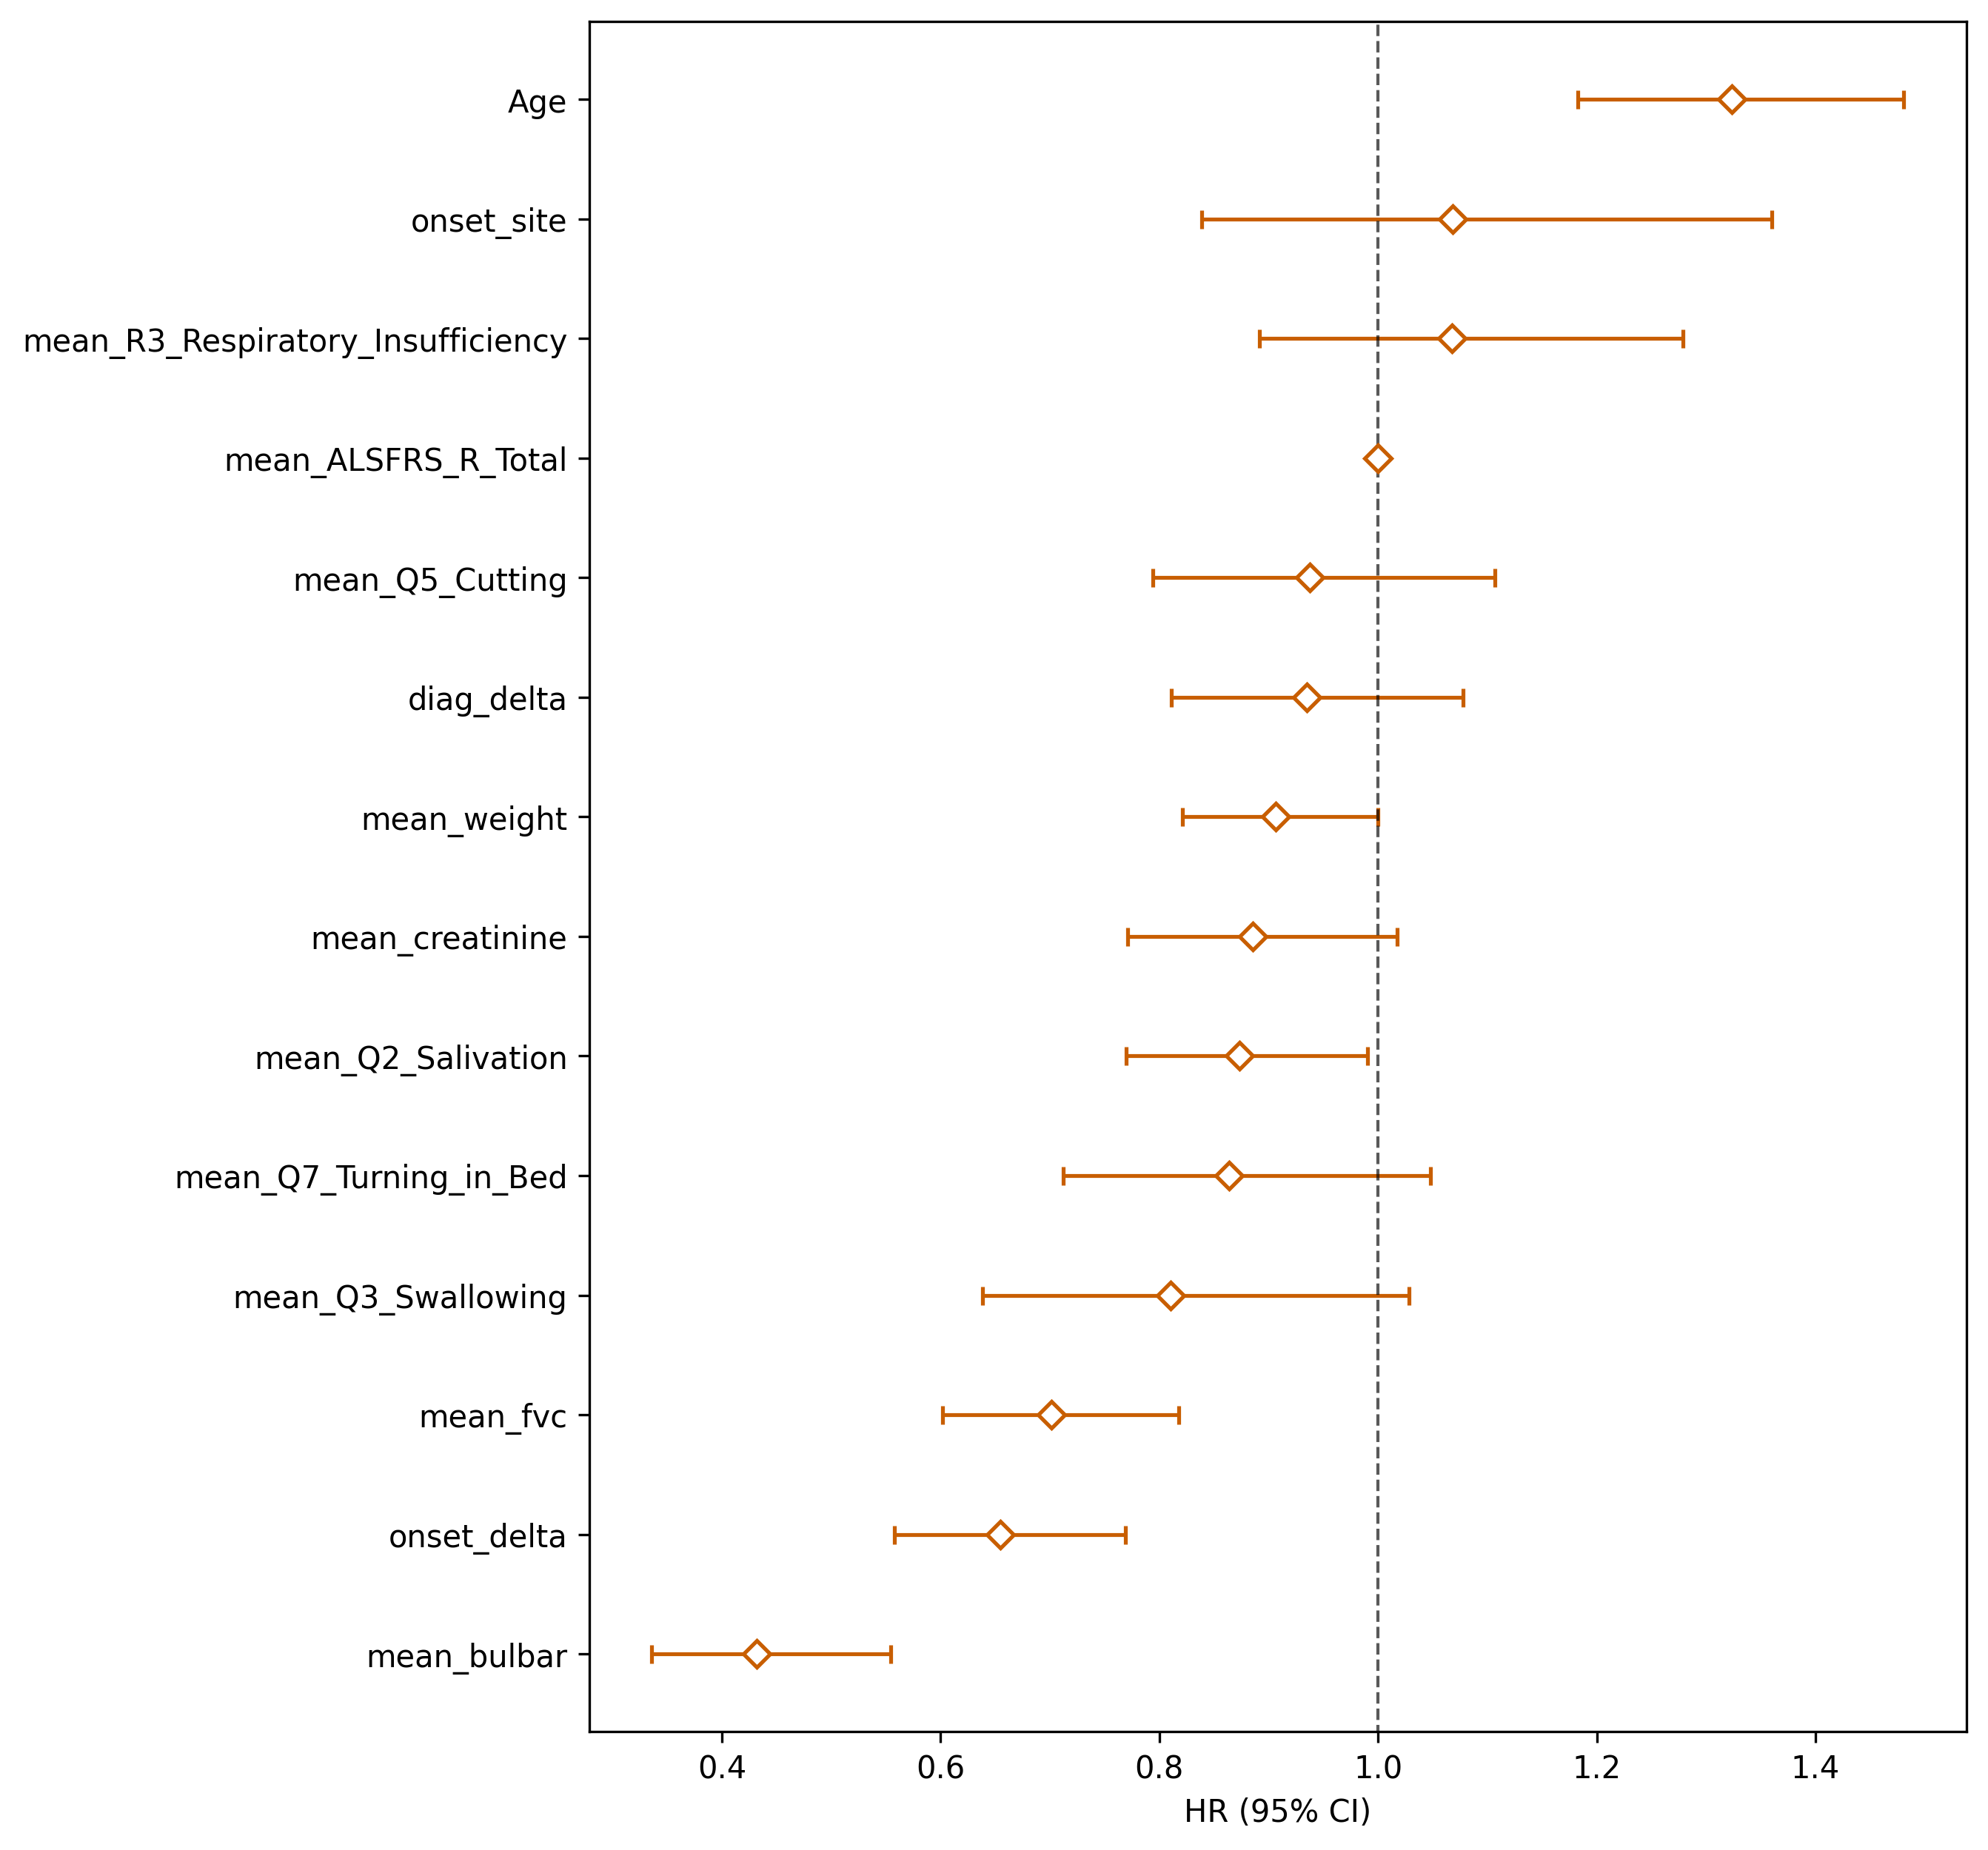

In [ ]:
# Print 95% CI Hazard ratios in a plot
plt.figure(figsize=(8,10))
ax = cph.plot(hazard_ratios=True, c='#C85E00', marker='D')
ax.yaxis.set_visible(True) #HR >1, or log(HR)>0 means that a feature increases the risk of event occurence

## 1-3. RSF

In [ ]:
#load packages
from sksurv.ensemble import RandomSurvivalForest

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=e1cd52918e4cb4037fd66deb9fa07056fbd95509262dd48a1d89b8a2101110fb
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Random Survival Forests requires array-type data, thus additional preprocessing was needed
dic = {1:True, 0:False}

df_train_rsf = df_train_imputed[['status_LOA', 'time_LOA']]
df_train_rsf = df_train_rsf.replace({'status_LOA':dic})

In [ ]:
arr_1 = list(tuple(x) for x in df_train_rsf.to_records(index=False))
dt = np.dtype('bool, float')
y_train_rsf = np.array(arr_1, dtype=dt)
y_train_rsf.dtype.names=['cens', 'time']
y_train_rsf

array([(False, 10.18), ( True,  6.44), (False,  2.06), ...,
       (False, 10.78), (False,  3.05), (False,  1.14)],
      dtype=[('cens', '?'), ('time', '<f8')])

In [ ]:
#Fit RSF model
#CAUTION! Runtime takes 1 min
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=14,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train_imputed[rsf_final_feature_list], y_train_rsf)

RandomSurvivalForest(max_features='auto', min_samples_leaf=14,
                     min_samples_split=8, n_jobs=-1, random_state=20)

In [ ]:
#feature list
feature_names = df_train_imputed[rsf_final_feature_list].columns.tolist()
feature_names

['mean_Q2_Salivation',
 'Age',
 'mean_fvc',
 'mean_ALSFRS_R_Total',
 'mean_Q3_Swallowing',
 'onset_delta',
 'mean_bulbar',
 'mean_Q1_Speech']

In [ ]:
#CAUTION! Runtime takes 4 mins
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rsf, n_iter=15, random_state=20)
perm.fit(df_train_imputed[rsf_final_feature_list], y_train_rsf)

PermutationImportance(estimator=RandomSurvivalForest(max_features='auto',
                                                     min_samples_leaf=14,
                                                     min_samples_split=8,
                                                     n_jobs=-1,
                                                     random_state=20),
                      n_iter=15, random_state=20)

In [ ]:
#To present Perm Importance results in forms of 'median ± STD', these following steps have been done
data = perm.results_
data = pd.DataFrame(data, columns=rsf_final_feature_list)
means = data.mean()
means = means.sort_values(ascending=False)
data = data[means.index]
data = np.transpose(data)

In [ ]:
data['50%'] = data.quantile(0.5, axis = 1)
data['75%'] = data.quantile(0.75, axis = 1)
data['25%'] = data.quantile(0.25, axis = 1)
data['std'] = data.std(axis=1)
data[['50%','75%','25%', 'std']]

,50%,75%,25%,std
mean_bulbar,0.035126,0.037156,0.031773,0.003140
mean_ALSFRS_R_Total,0.032580,0.033123,0.031594,0.001616
onset_delta,0.030299,0.031371,0.029696,0.001276
mean_fvc,0.023321,0.024296,0.022046,0.001463
mean_Q1_Speech,0.017450,0.018749,0.015953,0.001935
Age,0.016157,0.016959,0.015421,0.001206
mean_Q3_Swallowing,0.015229,0.015898,0.014243,0.001478
mean_Q2_Salivation,0.011253,0.011630,0.010827,0.000865


In [ ]:
Feat_imp = data[['50%','75%','25%']].transpose()
Feat_imp.columns = list(data.index)
Feat_imp

,mean_bulbar,mean_ALSFRS_R_Total,onset_delta,mean_fvc,mean_Q1_Speech,Age,mean_Q3_Swallowing,mean_Q2_Salivation
50%,0.035126,0.032580,0.030299,0.023321,0.017450,0.016157,0.015229,0.011253
75%,0.037156,0.033123,0.031371,0.024296,0.018749,0.016959,0.015898,0.011630
25%,0.031773,0.031594,0.029696,0.022046,0.015953,0.015421,0.014243,0.010827


In [ ]:
Feat_imp_summary = data[['50%','75%','25%', 'std']].round(4).astype('str').copy()
Feat_imp_summary['Median feature importance (IQR)'] = Feat_imp_summary['50%'] + " ("+Feat_imp_summary['25%']+" - "+Feat_imp_summary['75%']+")"
Feat_imp_summary['STD'] = Feat_imp_summary['std']
Feat_imp_summary[['Median feature importance (IQR)', 'STD']]

,Median feature importance (IQR),STD
mean_bulbar,0.0351 (0.0318 - 0.0372),0.0031
mean_ALSFRS_R_Total,0.0326 (0.0316 - 0.0331),0.0016
onset_delta,0.0303 (0.0297 - 0.0314),0.0013
mean_fvc,0.0233 (0.022 - 0.0243),0.0015
mean_Q1_Speech,0.0174 (0.016 - 0.0187),0.0019
Age,0.0162 (0.0154 - 0.017),0.0012
mean_Q3_Swallowing,0.0152 (0.0142 - 0.0159),0.0015
mean_Q2_Salivation,0.0113 (0.0108 - 0.0116),0.0009


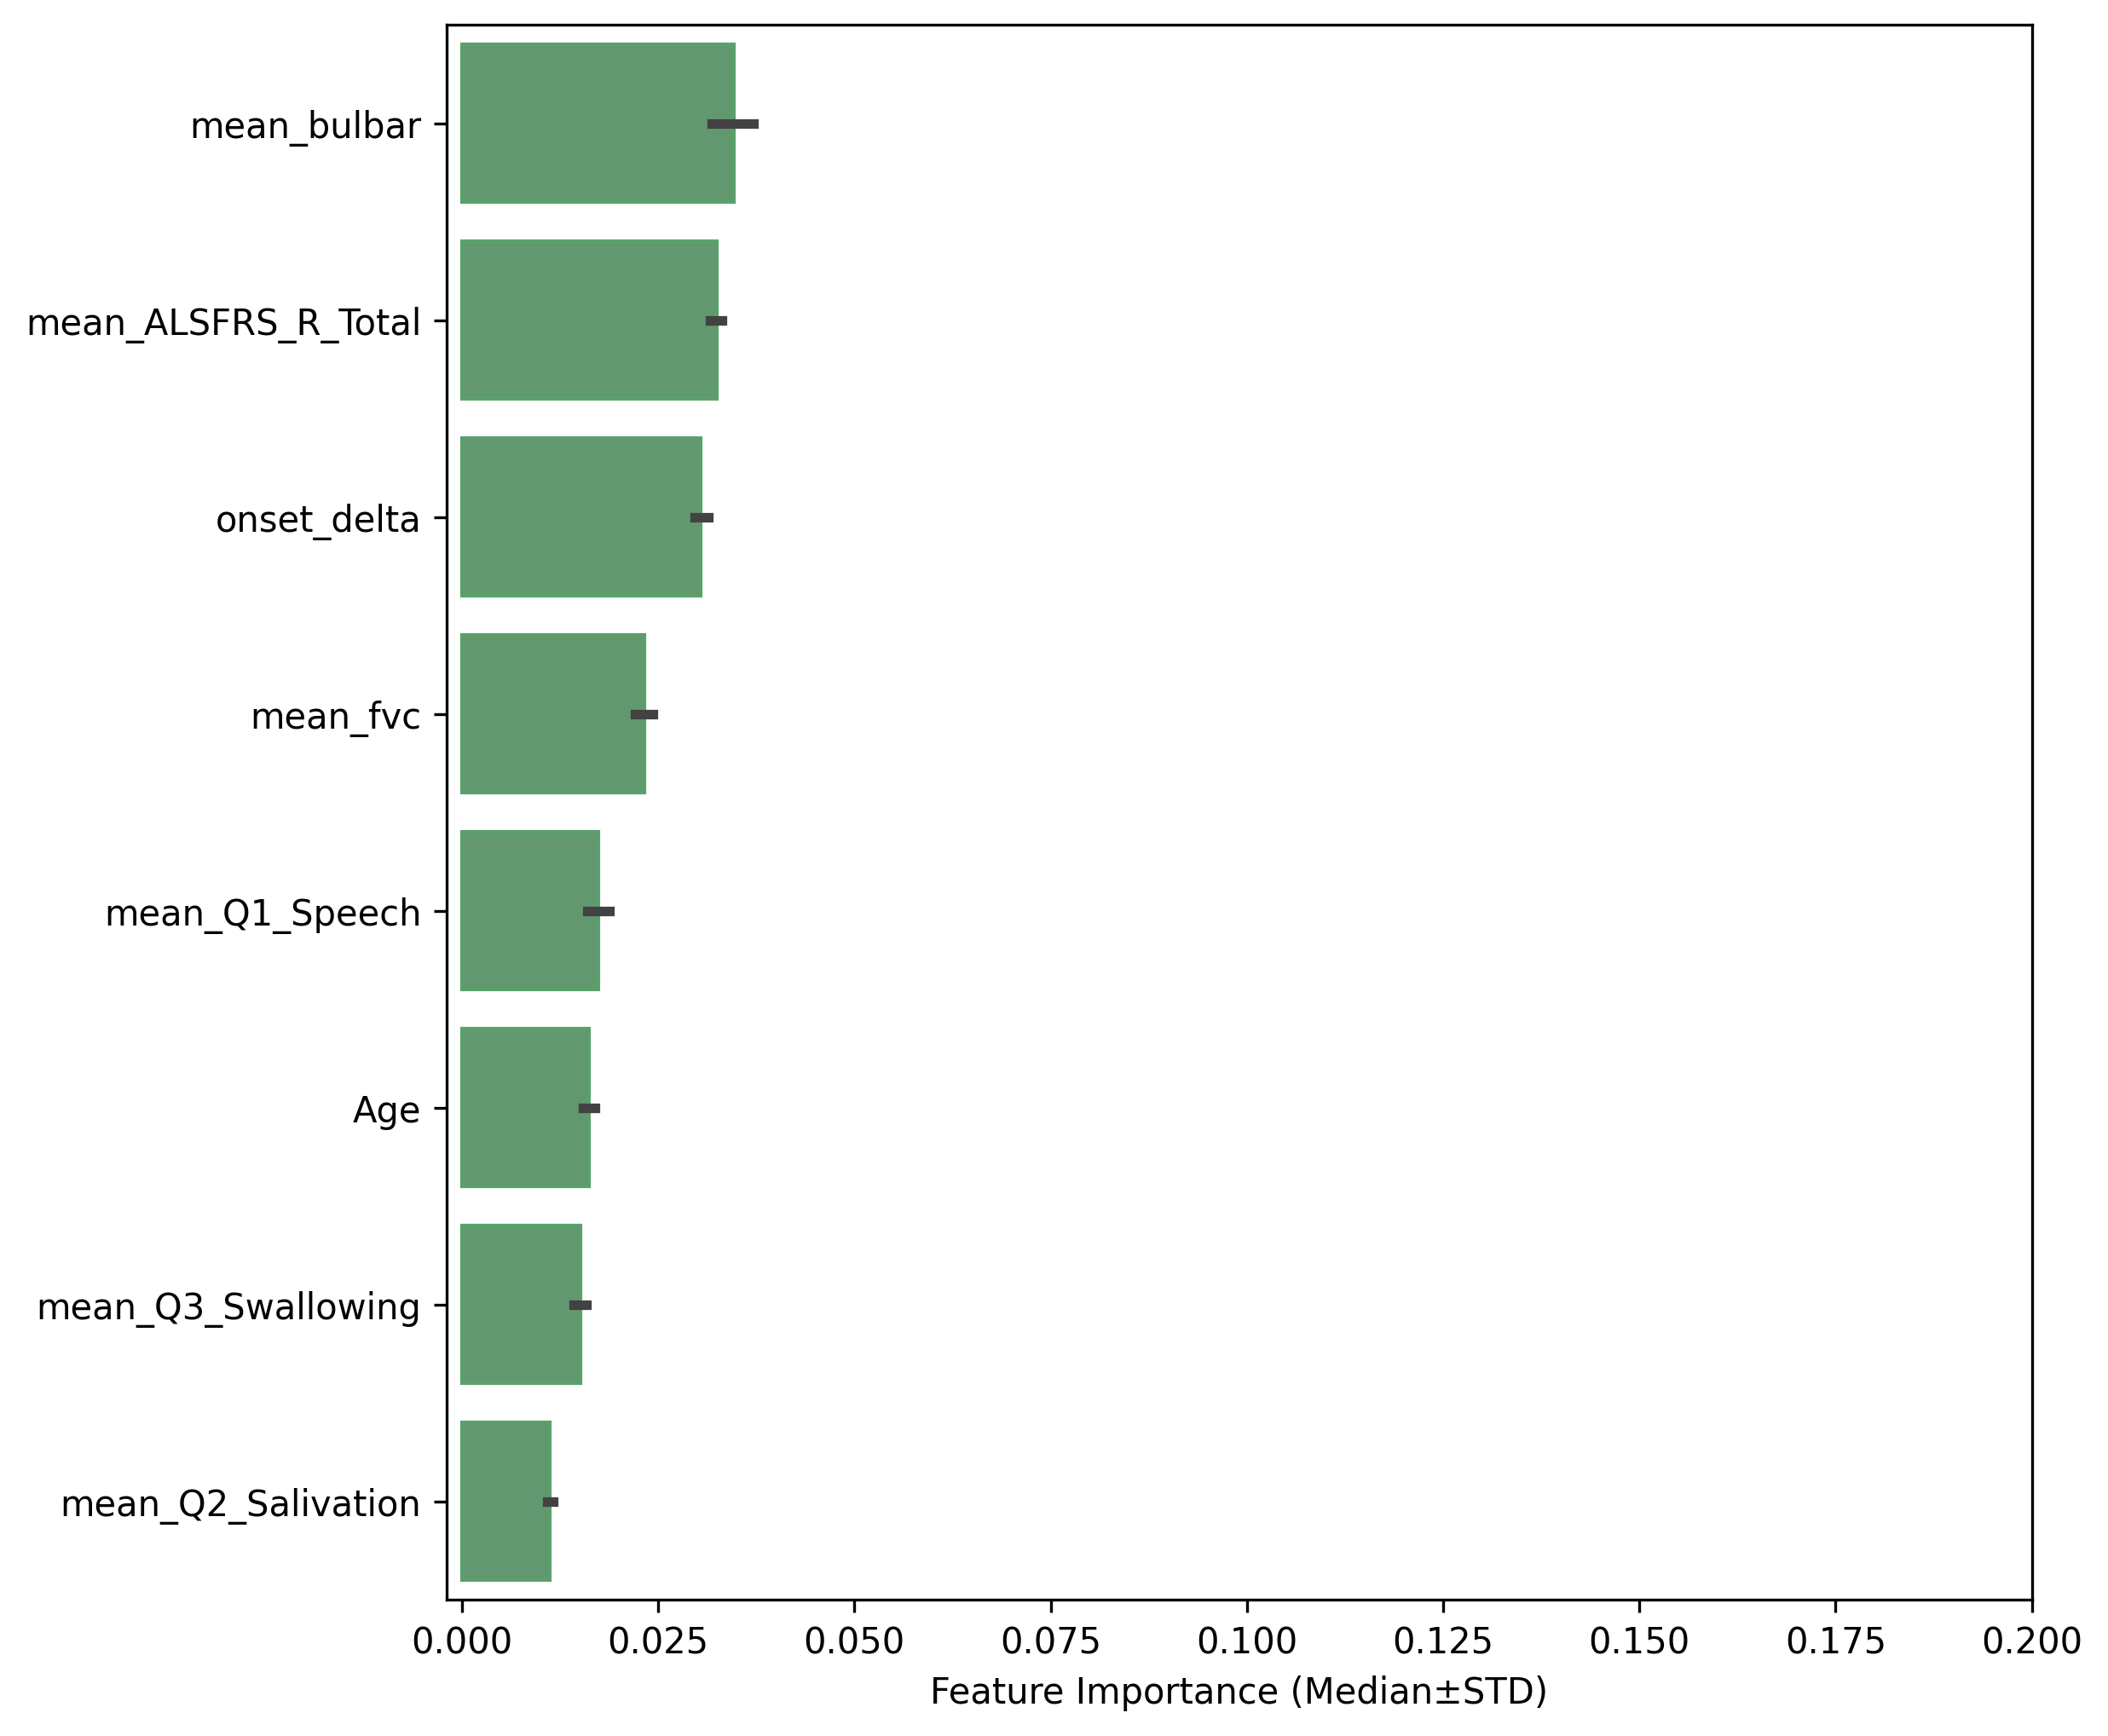

In [ ]:
df = pd.DataFrame(data=Feat_imp, columns=list(data.index))

import matplotlib
matplotlib.rc('axes',edgecolor='k')

fig, ax = plt.subplots()
ax.grid(False)
fig.set_size_inches(8, 8)
sns.barplot(x="value", y="variable", data=pd.melt(df), color='#59A16A', edgecolor='#59A16A', dodge=False)
ax.set_xlabel('Feature Importance (Median±STD)')
ax.set_xlim([-0.002,0.2])
ax.set_ylabel('')
ax.yaxis.set_visible(True)

# 2. Performance measure

## 2-1. C-index (cross-validation)

In [ ]:
from lifelines.utils import concordance_index
from sklearn.model_selection import KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
def repeated_cross_validation_c_index(df_train, model, feature_list, num_folds, num_repeats):
    total_samples = len(df_train)

    C_Idx = np.array([])

    for i in range(num_repeats):
            np.random.seed(i)  # Set a random seed for reproducibility

            for fold in range(num_folds):
                # Set the folding margin
                indices = np.random.permutation(total_samples)
                start = fold * (total_samples // num_folds)
                end = (fold + 1) * (total_samples // num_folds)

                # Make 5 fold indices
                train_indices = np.concatenate([indices[:start], indices[end:]])
                test_indices = indices[start:end]

                # Split data into train and test
                train_data = df_train.iloc[train_indices][feature_list + ['time_LOA', 'status_LOA']].copy()
                test_data = df_train.iloc[test_indices][feature_list + ['time_LOA', 'status_LOA']].copy()

                # Impute data within each fold
                imputer = IterativeImputer(max_iter=10, random_state=11)
                imputer.fit(train_data[feature_list])
                train_data[feature_list] = imputer.transform(train_data[feature_list])
                test_data[feature_list] = imputer.transform(test_data[feature_list])

                # Calculate C-index within each fold
                model.fit(train_data[feature_list+ ['time_LOA', 'status_LOA']], 'time_LOA', event_col='status_LOA')
                c_index = concordance_index(test_data['time_LOA'],
                                            model.predict_median(test_data[feature_list]),
                                            test_data['status_LOA'])
                C_Idx = np.append(C_Idx, c_index)

    return C_Idx

In [ ]:
def repeated_cross_validation_c_index_rsf(df_train, model, feature_list, num_folds, num_repeats):
    total_samples = len(df_train)
    dt = np.dtype('bool, float')
    C_Idx_rsf = np.array([])

    for i in range(num_repeats):
        np.random.seed(i)  # Set a random seed for reproducibility

        for fold in range(num_folds):
          # Set the folding margin
          indices = np.random.permutation(total_samples)
          start = fold * (total_samples // num_folds)
          end = (fold + 1) * (total_samples // num_folds)

          # Make 5 fold indices
          train_indices = np.concatenate([indices[:start], indices[end:]])
          test_indices = indices[start:end]

          # Split data into train and test
          train_data = df_train.iloc[train_indices][feature_list + ['time_LOA', 'status_LOA']].copy()
          test_data = df_train.iloc[test_indices][feature_list + ['time_LOA', 'status_LOA']].copy()

          # Impute data within each fold
          imputer = IterativeImputer(max_iter=10, random_state=11)
          imputer.fit(train_data[feature_list])
          train_data[feature_list] = imputer.transform(train_data[feature_list])
          test_data[feature_list] = imputer.transform(test_data[feature_list])

          # since RSF requires special data type, additional code was written
          y_train = train_data[['status_LOA', 'time_LOA']].replace({'status_LOA':dic})
          y_test  = test_data[['status_LOA', 'time_LOA']].replace({'status_LOA':dic})
          y_train_rsf = np.array(list(tuple(x) for x in y_train.to_records(index=False)), dtype=dt)
          y_test_rsf = np.array(list(tuple(x) for x in y_test.to_records(index=False)), dtype=dt)
          y_train_rsf.dtype.names=['cens', 'time']
          y_test_rsf.dtype.names=['cens', 'time']

          rsf.fit(train_data[rsf_final_feature_list], y_train_rsf)
          score = rsf.score(test_data[rsf_final_feature_list], y_test_rsf)

          C_Idx_rsf = np.append(C_Idx_rsf, score)

    return C_Idx_rsf

5-fold cross validation repeated 10 times

In [ ]:
#CAUTION! Runtime takes 2 min
C_Idx_aft = repeated_cross_validation_c_index(df_train_with_NaN_scaled, aft, aft_final_feature_list, num_folds=5, num_repeats=10)
C_Idx_aft

array([0.8623681 , 0.86158098, 0.82848787, 0.87291362, 0.85942752,
       0.83035233, 0.86410888, 0.88398291, 0.85489767, 0.86937883,
       0.85052886, 0.84398377, 0.82839407, 0.84964604, 0.85036036,
       0.84163311, 0.85490049, 0.83460873, 0.85575944, 0.88355418,
       0.83531151, 0.85755336, 0.82003377, 0.85097158, 0.84437588,
       0.85913737, 0.87241625, 0.84446339, 0.84622837, 0.85217193,
       0.87962658, 0.85418222, 0.84358886, 0.84074092, 0.84830582,
       0.86129992, 0.85661285, 0.83327616, 0.84979296, 0.85665446,
       0.85487505, 0.85171046, 0.8412365 , 0.84000871, 0.86029247,
       0.85127982, 0.83524074, 0.85387304, 0.85019881, 0.83568684])

In [ ]:
#CAUTION! Runtime takes 4 min
C_Idx_cph = repeated_cross_validation_c_index(df_train_with_NaN_scaled, cph, cph_final_feature_list, num_folds=5, num_repeats=10)
C_Idx_cph

array([0.86138387, 0.86033415, 0.8269714 , 0.87202691, 0.85934874,
       0.82483952, 0.86364154, 0.88377789, 0.85442267, 0.86783683,
       0.84982219, 0.8430869 , 0.82720515, 0.85176758, 0.84796171,
       0.84044407, 0.85291025, 0.83443792, 0.8536116 , 0.88236295,
       0.83204431, 0.85750949, 0.82101879, 0.84898529, 0.84377169,
       0.85987285, 0.8715451 , 0.84530247, 0.84687428, 0.84987426,
       0.87995607, 0.85447828, 0.84188152, 0.83956486, 0.84692659,
       0.86297874, 0.85517234, 0.83453402, 0.84594227, 0.8544359 ,
       0.85288289, 0.85077729, 0.84107589, 0.84000871, 0.85955233,
       0.849745  , 0.83404521, 0.85306302, 0.85075171, 0.8364486 ])

In [ ]:
#CAUTION! Runtime takes 20 mins
C_Idx_rsf = repeated_cross_validation_c_index_rsf(df_train_with_NaN, rsf, rsf_final_feature_list, num_folds=5, num_repeats=10)
C_Idx_rsf

array([0.84964179, 0.84755413, 0.82705806, 0.87231379, 0.85491071,
       0.82616259, 0.85382757, 0.88484613, 0.84921831, 0.85409011,
       0.83546093, 0.85199454, 0.82471466, 0.84850284, 0.8402027 ,
       0.84092675, 0.85457504, 0.83870821, 0.84535545, 0.87148303,
       0.8250707 , 0.85086315, 0.8256841 , 0.8545242 , 0.84710117,
       0.86173024, 0.85303318, 0.84462321, 0.83550173, 0.84490169,
       0.87531576, 0.85989754, 0.8485161 , 0.82841672, 0.84222415,
       0.85832446, 0.84425975, 0.82652945, 0.83242984, 0.84571927,
       0.84805374, 0.85060762, 0.83604734, 0.82633126, 0.83956847,
       0.83883209, 0.83881713, 0.85586336, 0.84878714, 0.83850649])

Comparing between models

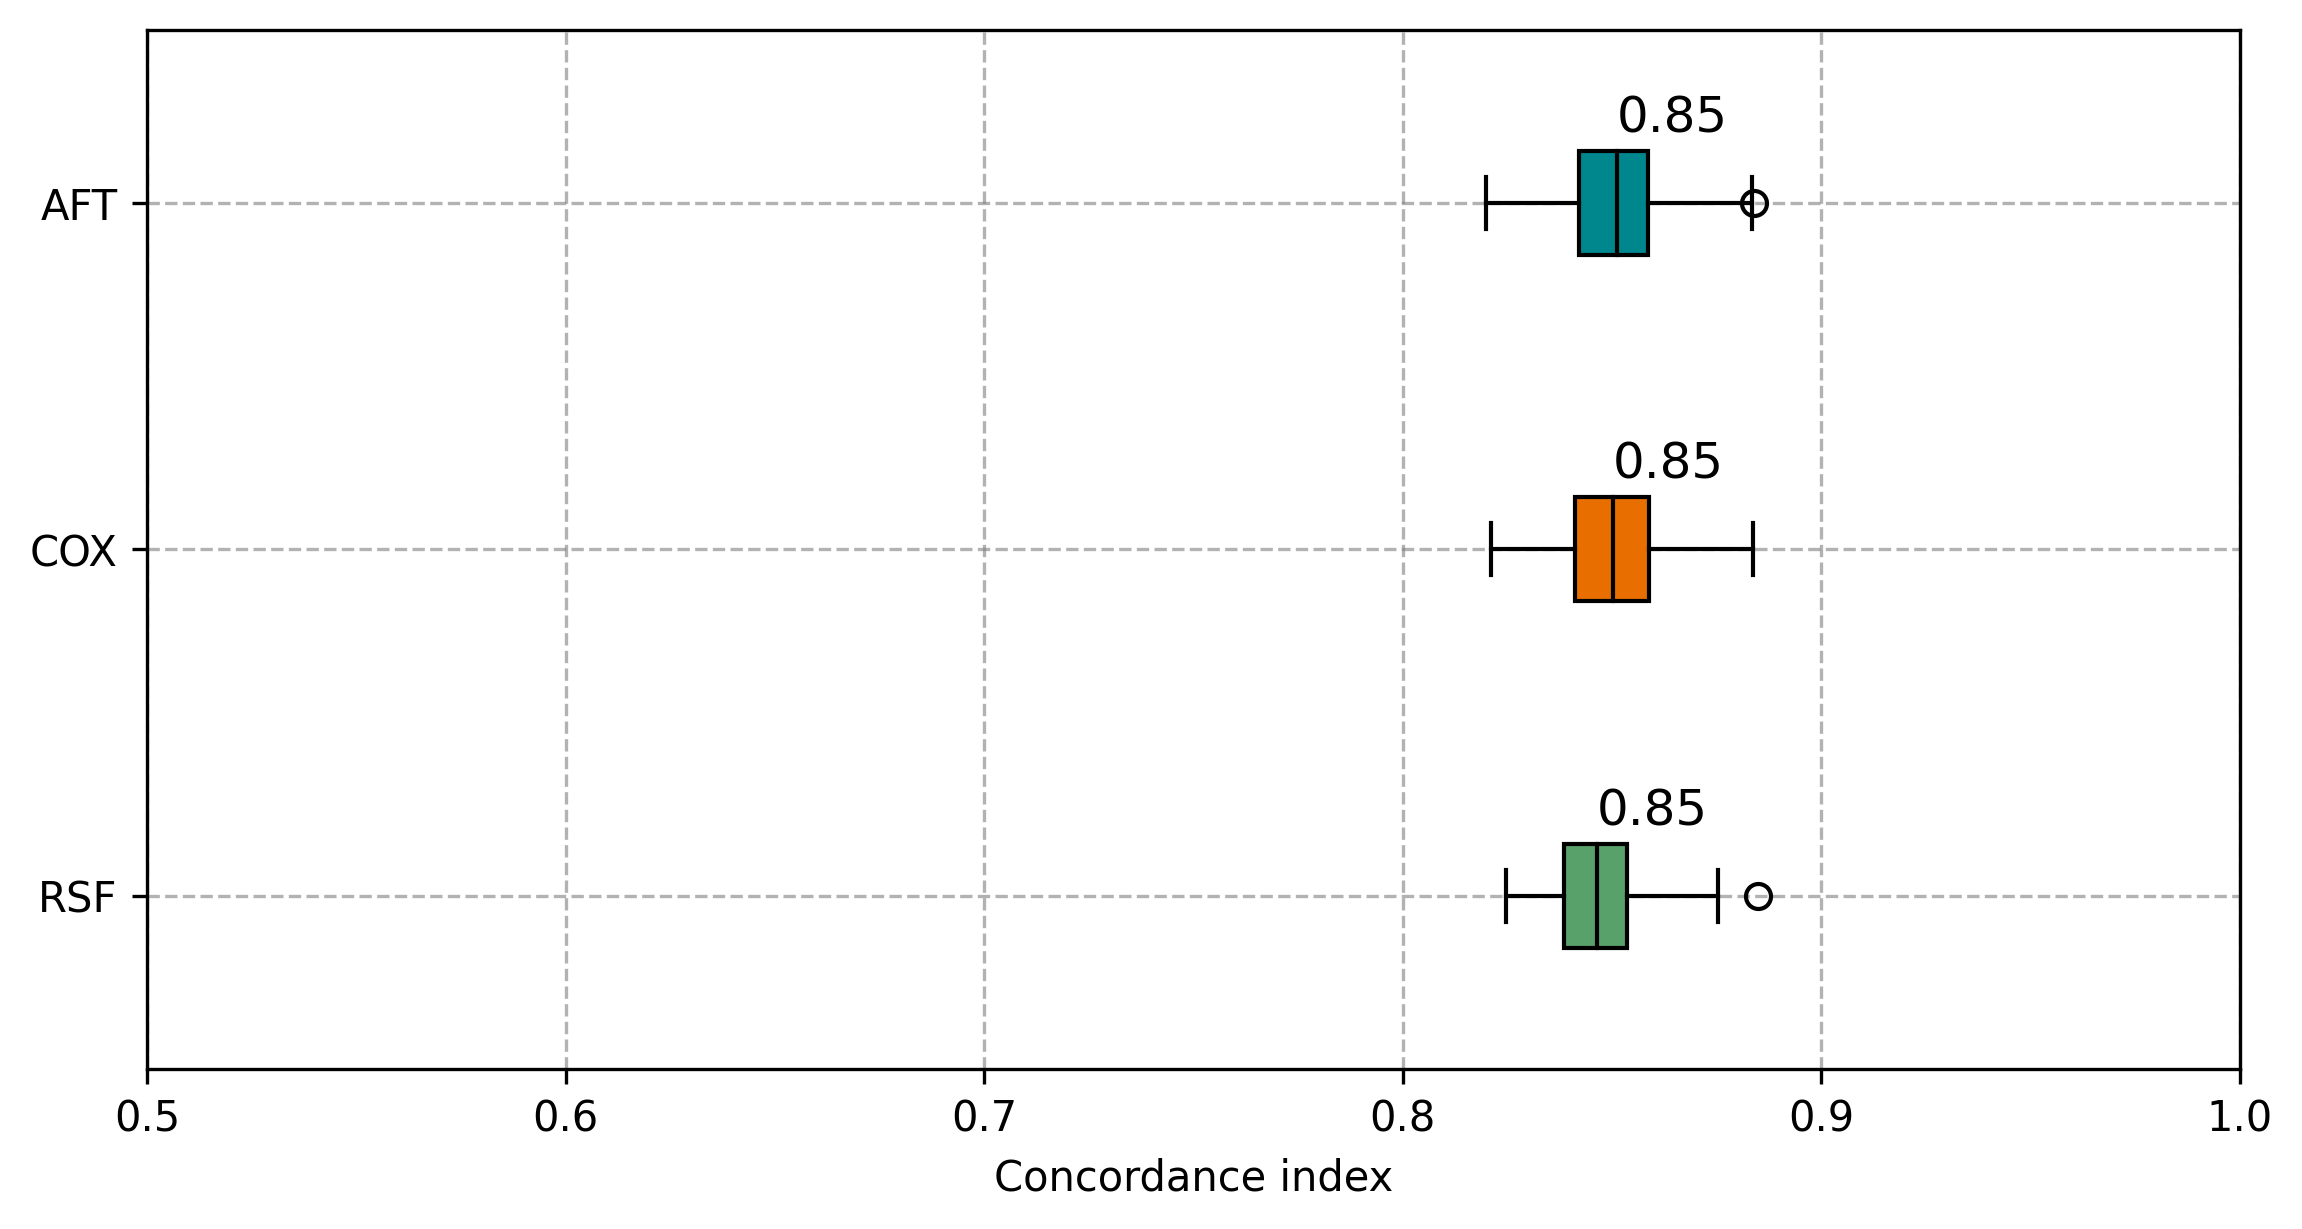

In [ ]:
df = pd.DataFrame([C_Idx_aft, C_Idx_cph,C_Idx_rsf], index=['AFT', 'CoxPH', 'RSF'])
df2 = df.transpose()

colors = ['#59A16A', '#E86E00', '#00878E']

aft_median = np.median(df2['AFT'])
cox_median = np.median(df2['CoxPH'])
rsf_median = np.median(df2['RSF'])
aft_std = np.std(df2['AFT'])
cox_std = np.std(df2['CoxPH'])
rsf_std = np.std(df2['RSF'])

plt.figure(figsize=(9,4.5))
C_Idx_Box = plt.boxplot(df2[[ 'RSF', 'CoxPH', 'AFT']].values, vert=False, patch_artist=True)
plt.yticks([1,2,3], ['RSF', 'COX', 'AFT'])

for box, color in zip(C_Idx_Box['boxes'], colors):
    box.set(facecolor=color)  # Custom box face color
    box.set(edgecolor='black')  # Custom edge color

for median in C_Idx_Box['medians']:
    median.set(color='black')

plt.annotate(str(np.round(aft_median,2)), xy=(aft_median, 0.8)
                , xytext=(aft_median, 3.205) , fontsize=12)
plt.annotate(str(np.round(cox_median,2)), xy=(aft_median, 0.8)
                , xytext=(cox_median, 2.205) , fontsize=12)
plt.annotate(str(np.round(rsf_median,2)), xy=(aft_median, 0.8)
                , xytext=(rsf_median, 1.205) , fontsize=12)
plt.xlim([0.5,1.0])
plt.xlabel('Concordance index')
plt.grid(axis='both', linestyle='--', color='gray', alpha=0.6)
plt.show()

In [ ]:
print(aft_median)
print(cox_median)
print(rsf_median)
print(aft_std)
print(cox_std)
print(rsf_std)

0.8511257
0.850312985
0.84641022
0.013804162440087989
0.013970591387400502
0.013344644603068638


## 2-2. D-calibration

In [ ]:
from scipy.stats import chisquare

In [ ]:
# Fit models by whole train data
aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
aft.fit(df_train_imputed_scaled[aft_final_feature_list+['time_LOA', 'status_LOA']], duration_col='time_LOA', event_col='status_LOA', ancillary=False)

<lifelines.WeibullAFTFitter: fitted with 3396 total observations, 2781 right-censored observations>

In [ ]:
# Fit models by whole train data
cph = CoxPHFitter(penalizer = 0.01, l1_ratio = 1)
cph.fit(df_train_imputed_scaled[cph_final_feature_list+['time_LOA', 'status_LOA']], 'time_LOA', event_col='status_LOA')

<lifelines.CoxPHFitter: fitted with 3396 total observations, 2781 right-censored observations>

In [ ]:
# Fit models by whole train data
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=14,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train_imputed[rsf_final_feature_list], y_train_rsf)

RandomSurvivalForest(max_features='auto', min_samples_leaf=14,
                     min_samples_split=8, n_jobs=-1, random_state=20)

In [ ]:
# Check the Event Distribution
df_occurred =df_train_imputed.query('status_LOA == 1')
df_censored =df_train_imputed.query('status_LOA == 0')

print("There are", len(df_occurred), "uncensored and", len(df_censored), "censored data")

There are 615 uncensored and 2781 censored data


In [ ]:
#Define a function for D-calibration
def d_calibration_table(model, data, feature_list):
  global bin_cs
  df_occurred = data.query('status_LOA == 1')
  df_censored = data.query('status_LOA == 0')
  calibration = pd.DataFrame(np.zeros((2, 10)))
  calibration.index = ['Occurred', 'Censored']
  calibration.columns = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

  if model == rsf:
    for i in range(len(df_occurred)):
      result = np.squeeze(model.predict_survival_function(df_occurred[feature_list].iloc[i, :].to_numpy().reshape(1, -1), return_array = True))
      time_result = pd.DataFrame({'time' : rsf.event_times_, 'p' : result })
      probability = time_result.iloc[(time_result['time']-df_occurred.iloc[i, :]['time_LOA']).abs().argsort()[:1]].iloc[0,1]
      if probability == 1:
        bin = 90
      else:
        bin = math.floor(probability*10)*10

      calibration.loc['Occurred'][bin] = calibration.loc['Occurred'][bin]+1

    for j in range(len(df_censored)):
      result_cs = np.squeeze(model.predict_survival_function(df_censored[feature_list].iloc[j, :].to_numpy().reshape(1, -1), return_array = True))
      time_result_cs = pd.DataFrame({'time' : rsf.event_times_, 'p' : result_cs })
      probability_cs = time_result_cs.iloc[(time_result_cs['time']-df_censored.iloc[j, :]['time_LOA']).abs().argsort()[:1]].iloc[0,1]
      if probability_cs == 1:
        bins_cs = 90
      else :
        bin_cs = math.floor(probability_cs*10)*10
      calibration.loc['Censored'][bin_cs] = calibration.loc['Censored'][bin_cs]+(1-(0.01*bin_cs/probability_cs))

      for k in range(0,bin_cs,10):
        calibration.loc['Censored'][k] = calibration.loc['Censored'][k]+(0.1/probability_cs)

  else :
    for i in range(len(df_occurred)):
      pred_curve = model.predict_survival_function(df_occurred[feature_list].iloc[i, :]).reset_index()
      probability = pred_curve.iloc[(pred_curve['index']-df_occurred.iloc[i, :]['time_LOA']).abs().argsort()[:1]].iloc[0,1]
      if probability == 1:
        bin=90
      else:
        bin = math.floor(probability*10)*10
      calibration.loc['Occurred'][bin] = calibration.loc['Occurred'][bin]+1

    for j in range(len(df_censored)):
      pred_curve_cs = model.predict_survival_function(df_censored[feature_list].iloc[j, :]).reset_index()
      probability_cs = pred_curve_cs.iloc[(pred_curve_cs['index']-df_censored.iloc[j, :]['time_LOA']).abs().argsort()[:1]].iloc[0,1]
      if probability_cs == 1:
        bins_cs = 90
      else :
        bin_cs = math.floor(probability_cs*10)*10
      calibration.loc['Censored'][bin_cs] = calibration.loc['Censored'][bin_cs]+(1-(0.01*bin_cs/probability_cs))

      for k in range(0,bin_cs,10):
        calibration.loc['Censored'][k] = calibration.loc['Censored'][k]+(0.1/probability_cs)

  calibration = np.transpose(calibration)
  calibration['Total'] = calibration['Occurred'] + calibration['Censored']
  quantile_list = ['[0%-10%)','[10%-20%)','[20%-30%)','[30%-40%)','[40%-50%)','[50%-60%)','[60%-70%)','[70%-80%)','[80%-90%)','[90%-100%]']
  calibration.index = quantile_list
  return calibration

In [ ]:
def chi_test(table, data):
  chi_df = (table/len(data)*100)[['Total']]
  chi_df['exp'] = 10
  chi_df.columns = ['obs', 'exp']
  chi_df = np.transpose(chi_df)
  chi_result = chisquare(np.array(chi_df.loc['obs']))

  return chi_result

In [ ]:
# D-calibration results
# CAUTION! Runtime takes
cph_d_calibration_result = d_calibration_table(cph, df_train_imputed_scaled, cph_final_feature_list)
aft_d_calibration_result = d_calibration_table(aft, df_train_imputed_scaled, aft_final_feature_list)
rsf_d_calibration_result = d_calibration_table(rsf, df_train_imputed, rsf_final_feature_list)

cph_d_calibration_result # result table looks like this

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/b

,Occurred,Censored,Total
[0%-10%),9.0,335.902787,344.902787
[10%-20%),4.0,323.047974,327.047974
[20%-30%),10.0,317.433430,327.433430
[30%-40%),20.0,312.577453,332.577453
[40%-50%),33.0,307.362133,340.362133
[50%-60%),41.0,299.229089,340.229089
[60%-70%),60.0,287.804366,347.804366
[70%-80%),89.0,265.351508,354.351508
[80%-90%),173.0,222.155749,395.155749
[90%-100%],176.0,110.135511,286.135511


<Figure size 2400x3000 with 0 Axes>

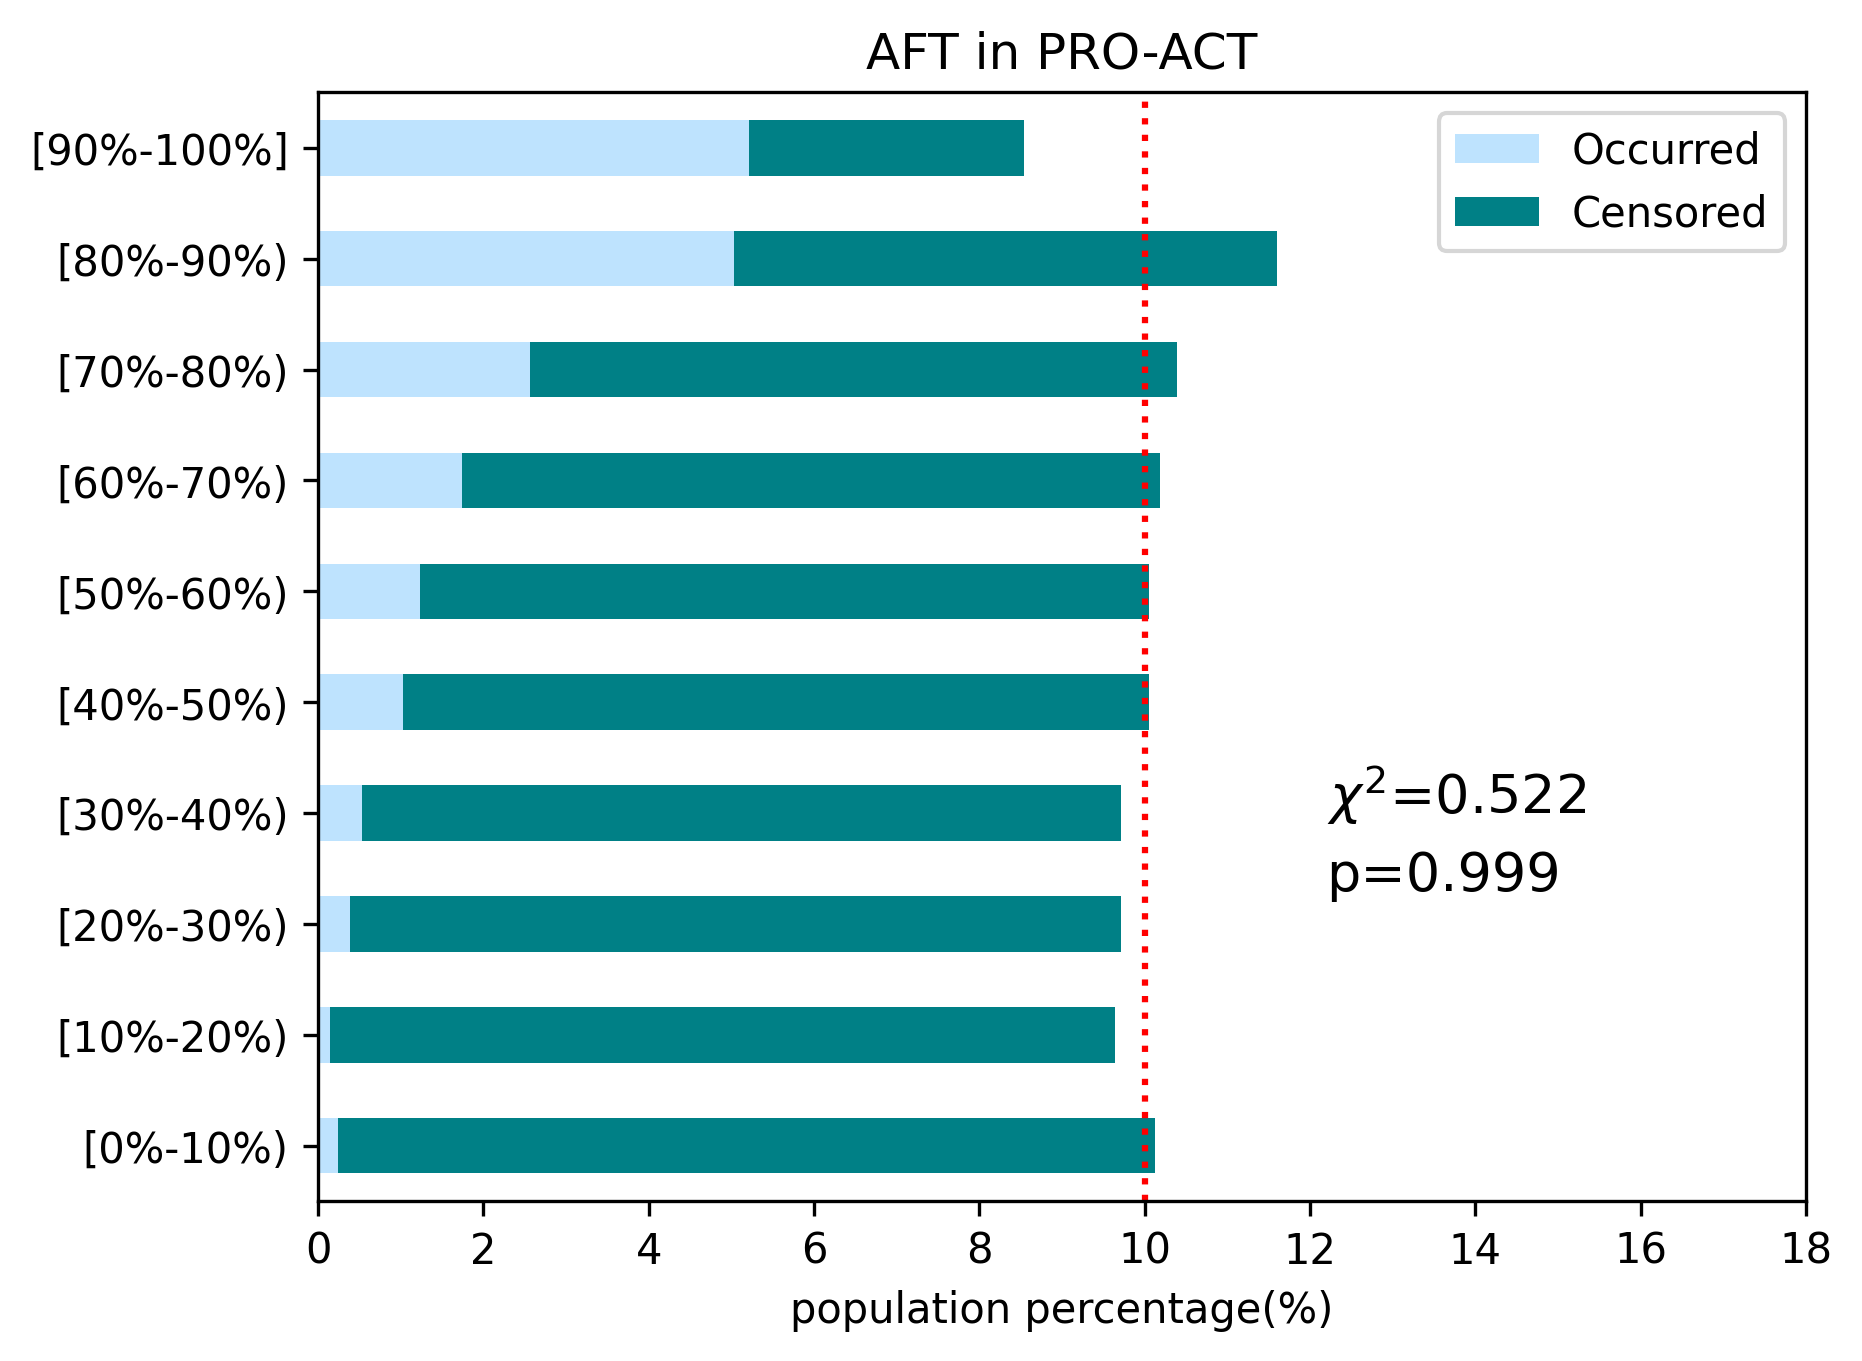

<Figure size 2400x3000 with 0 Axes>

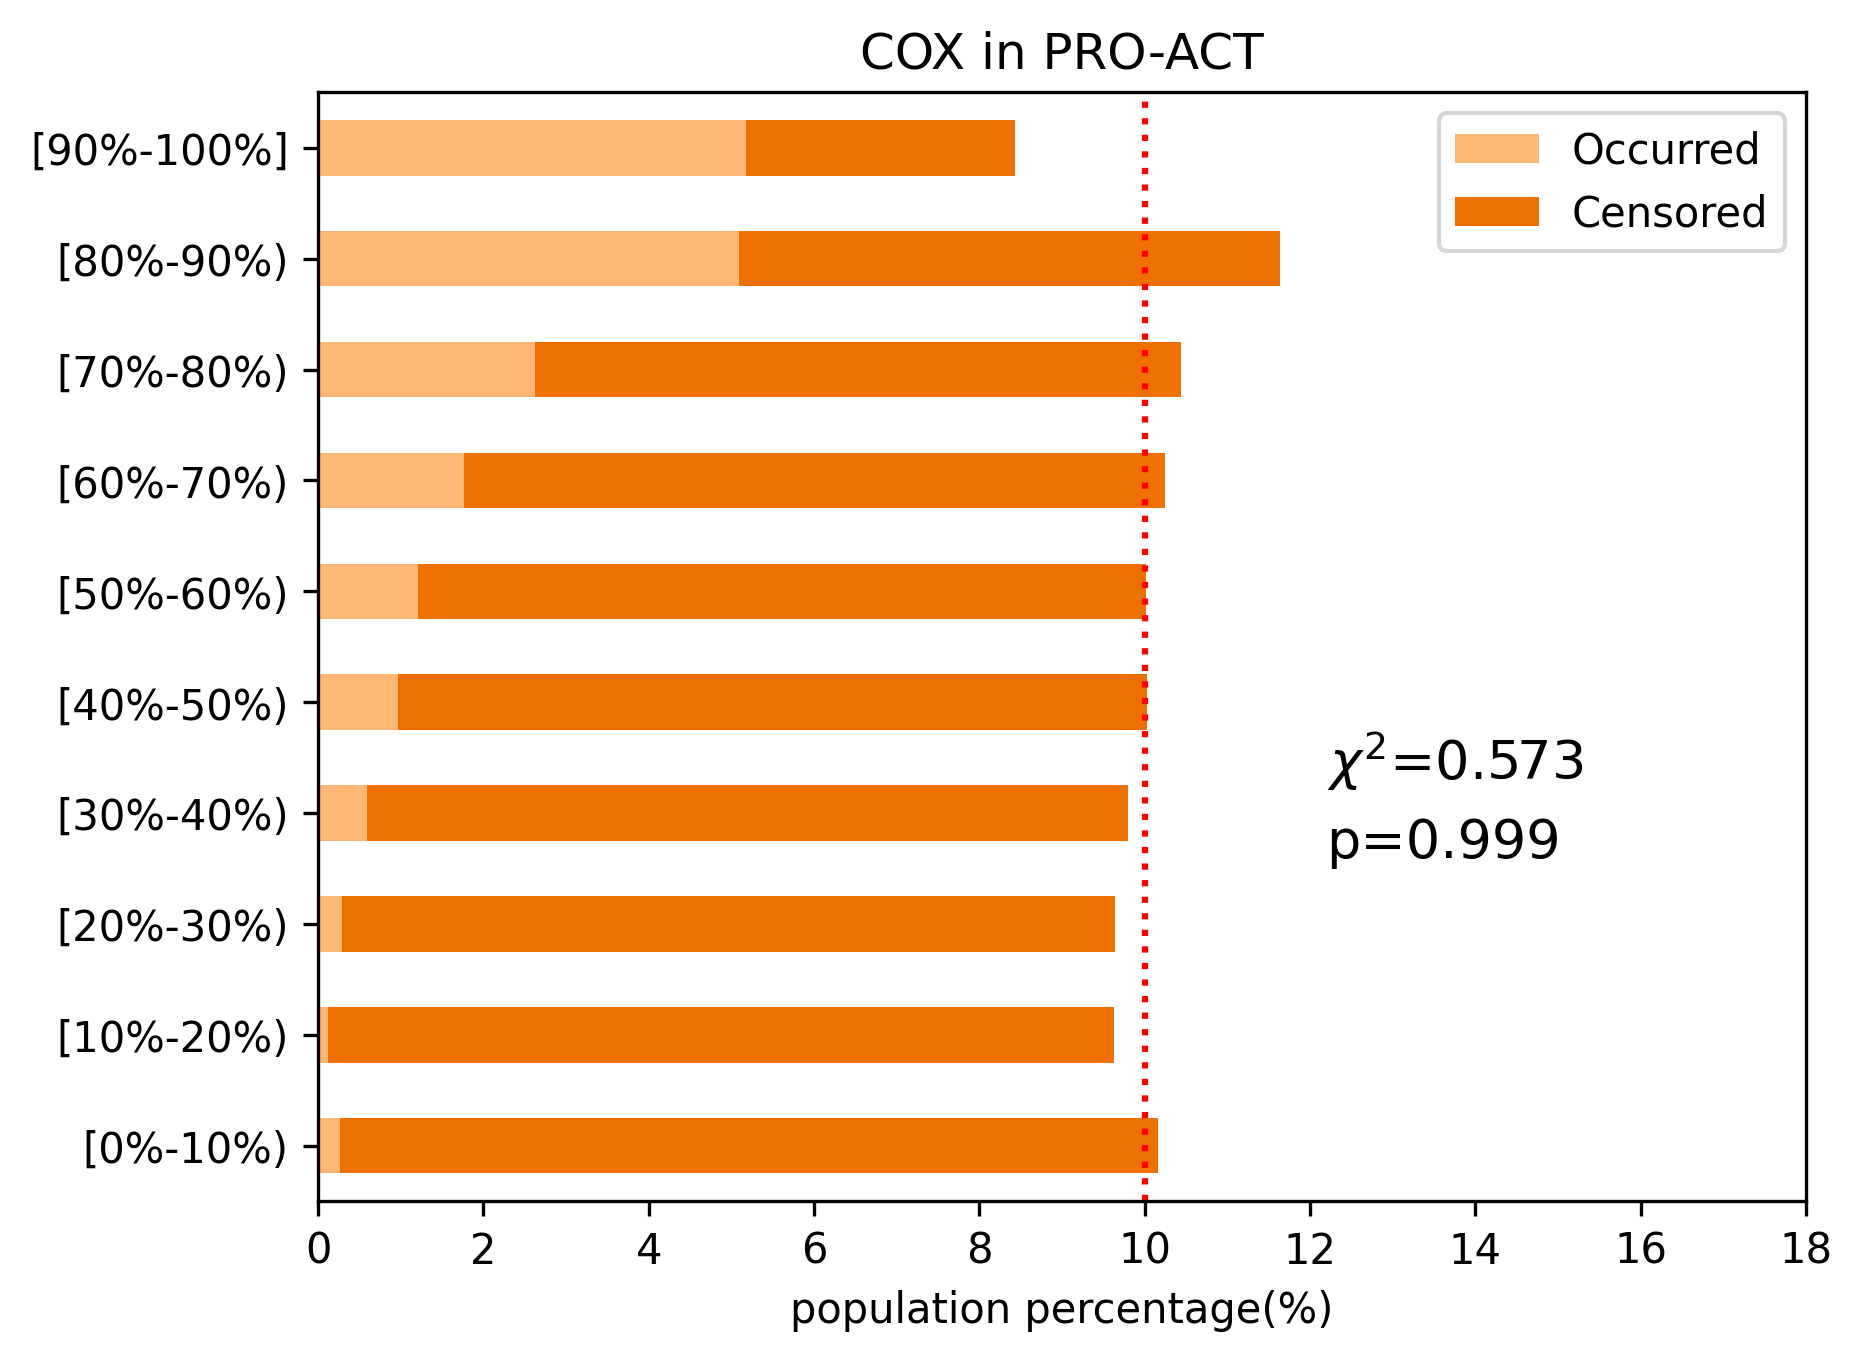

<Figure size 2400x3000 with 0 Axes>

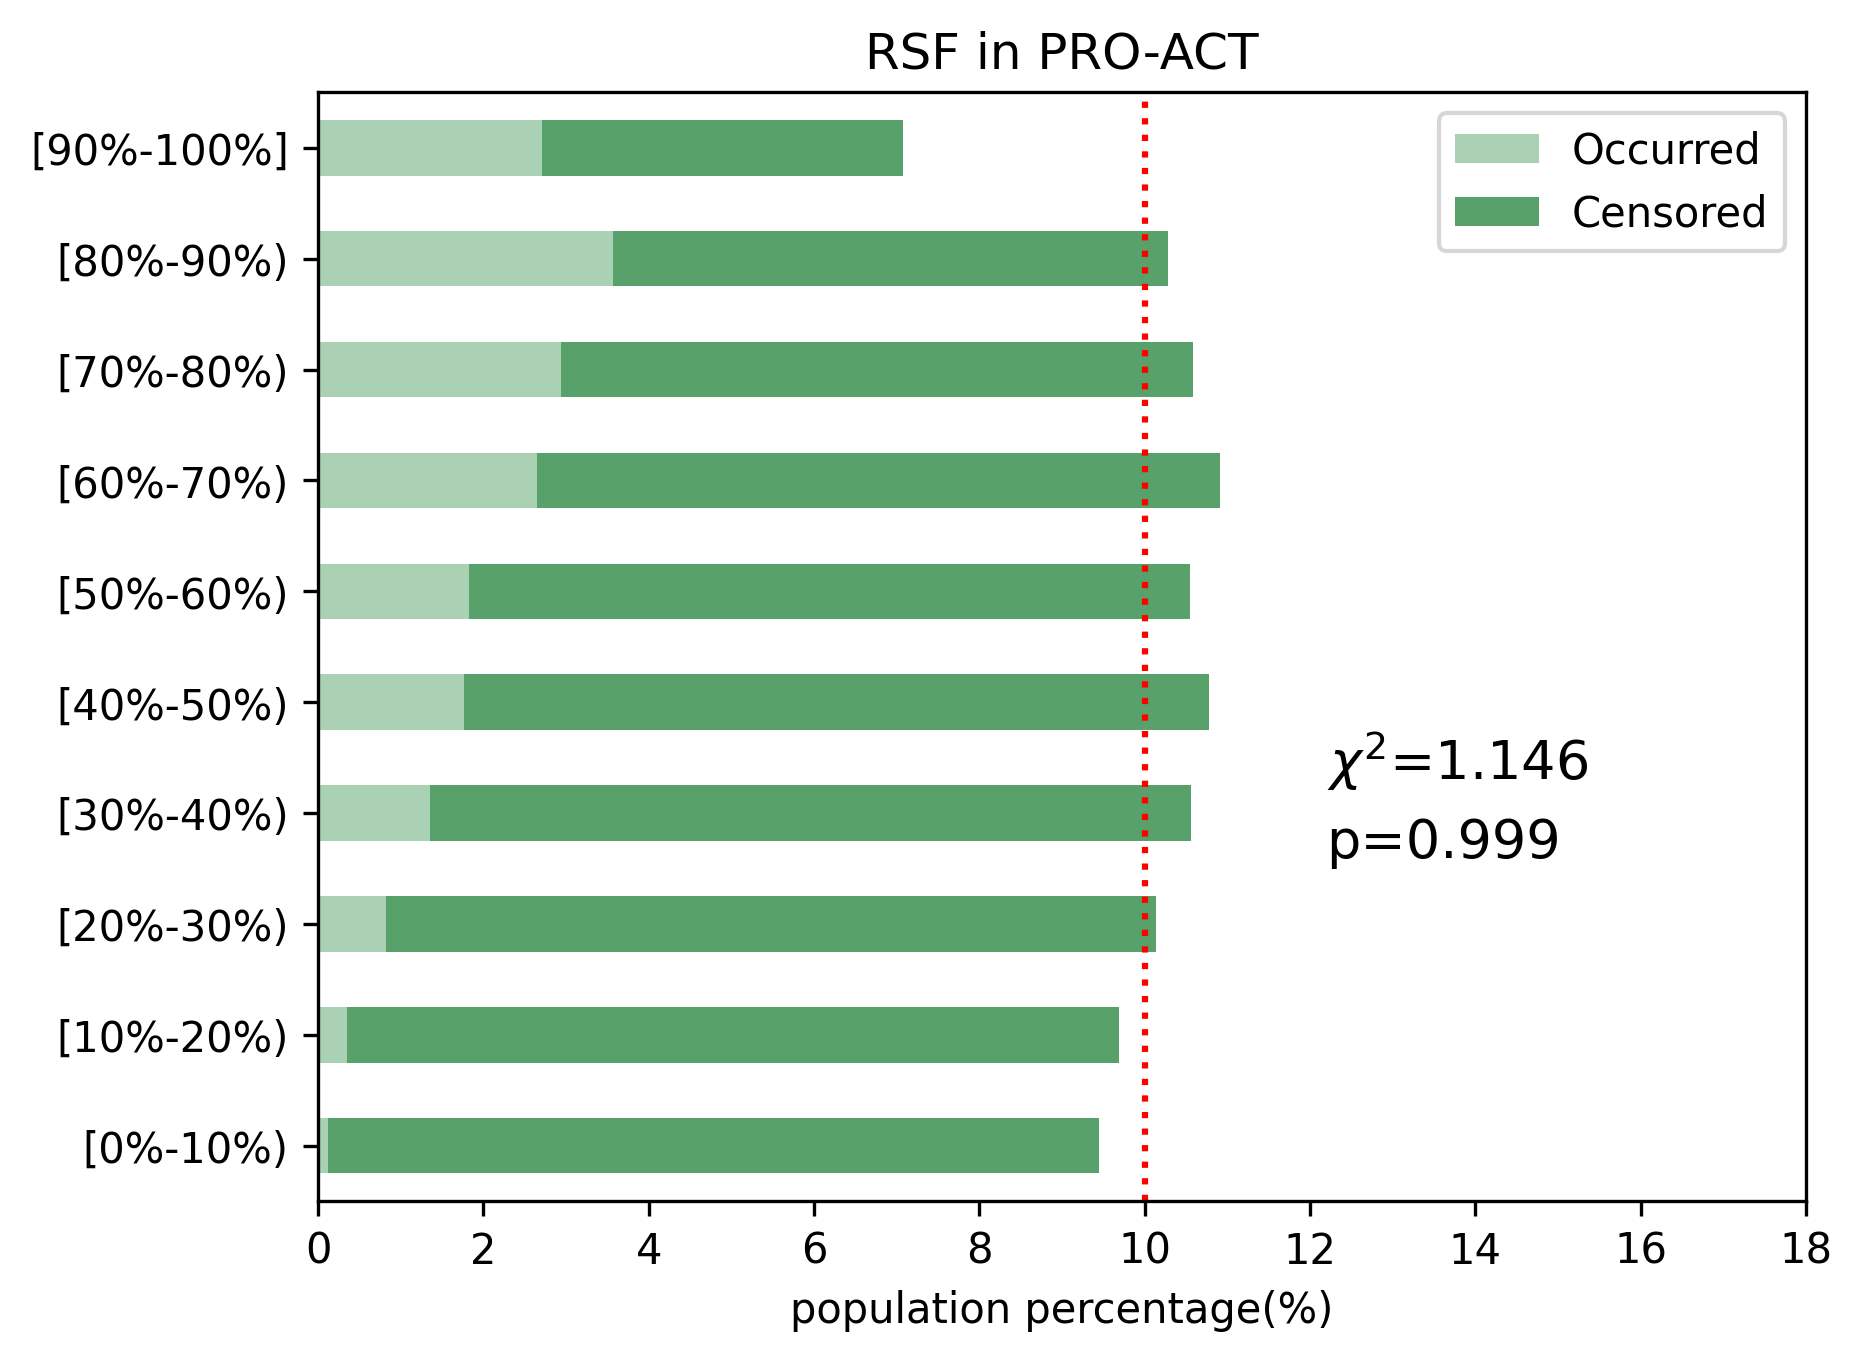

In [ ]:
plt.figure(figsize=(8,10))
(aft_d_calibration_result/33.96)[['Occurred', 'Censored']].plot(kind='barh', stacked=True, color=['#BEE3FE','#008086']) # the number '26.70' is because the length of training data is 2670
plt.title('AFT in PRO-ACT')
plt.xlim([0,18])
plt.axvline(x=10, color='red', linestyle=':')
plt.text(12.2, 3, '$\chi^2$=' + str(np.floor(chi_test(aft_d_calibration_result, df_train_imputed_scaled)[0]*1000)/1000),
         horizontalalignment='left', color='black', fontsize = 13)
plt.text(12.2, 2.3, 'p=' + str(np.floor(chi_test(aft_d_calibration_result, df_train_imputed_scaled)[1]*1000)/1000),
         horizontalalignment='left', color='black', fontsize = 13)
plt.xlabel('population percentage(%)')

plt.figure(figsize=(8,10))
(cph_d_calibration_result/33.96)[['Occurred', 'Censored']].plot(kind='barh', stacked=True, color=['#FFB775','#EE7100'])
plt.title('COX in PRO-ACT')
plt.xlabel('population percentage(%)')
plt.xlim([0,18])
plt.axvline(x=10, color='red', linestyle=':')
plt.text(12.2, 3.3, '$\chi^2$=' + str(np.floor(chi_test(cph_d_calibration_result, df_train_imputed_scaled)[0]*1000)/1000),
         horizontalalignment='left', color='black', fontsize = 13)
plt.text(12.2, 2.6, 'p=' + str(np.floor(chi_test(cph_d_calibration_result, df_train_imputed_scaled)[1]*1000)/1000),
         horizontalalignment='left', color='black', fontsize = 13)
plt.ylabel('')

plt.figure(figsize=(8,10))
(rsf_d_calibration_result/33.96)[['Occurred', 'Censored']].plot(kind='barh', stacked=True, color=['#ABD1B4','#59A16A'])
plt.title('RSF in PRO-ACT')
plt.xlabel('population percentage(%)')
plt.xlim([0,18])
plt.axvline(x=10, color='red', linestyle=':')
plt.text(12.2, 3.3, '$\chi^2$=' + str(np.floor(chi_test(rsf_d_calibration_result, df_train_imputed)[0]*1000)/1000),
         horizontalalignment='left', color='black', fontsize = 13)
plt.text(12.2, 2.6, 'p=' + str(np.floor(chi_test(rsf_d_calibration_result, df_train_imputed)[1]*1000)/1000),
         horizontalalignment='left', color='black', fontsize = 13)
plt.ylabel('')

plt.show()

In [ ]:
# Chi-square statistics
print("AFT : ", chi_test(aft_d_calibration_result, df_train_imputed_scaled))
#AFT : stats = 0.6481, pvalue = 0.9999
print("COX : ", chi_test(cph_d_calibration_result, df_train_imputed_scaled))
#COX : stats = 0.4986, pvalue = 0.9999
print("RSF : ", chi_test(rsf_d_calibration_result, df_train_imputed))
#RSF : stats = 2.2519, pvalue = 0.9868

AFT :  Power_divergenceResult(statistic=0.5228582047391049, pvalue=0.9999631288606238)
COX :  Power_divergenceResult(statistic=0.5734768064069368, pvalue=0.9999452533415037)
RSF :  Power_divergenceResult(statistic=1.1460376877186231, pvalue=0.9990205616557378)
